## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [190]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing


# Importing model building packages
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report

import warnings
warnings.filterwarnings("ignore")


### Setting dataframe display option
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

## Exploratory data analysis

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
## Checking number of rows and columns

df.shape

(284807, 31)

In [4]:
## Checking the dtypes and info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
## Checking the spread of numerical columns and other statistical metrics

df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,1.772925e-15,9.289524e-16,-1.803266e-15,1.674888e-15,1.475621e-15,3.501098e-15,1.392460e-15,-7.466538e-16,4.258754e-16,9.019919e-16,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


[]

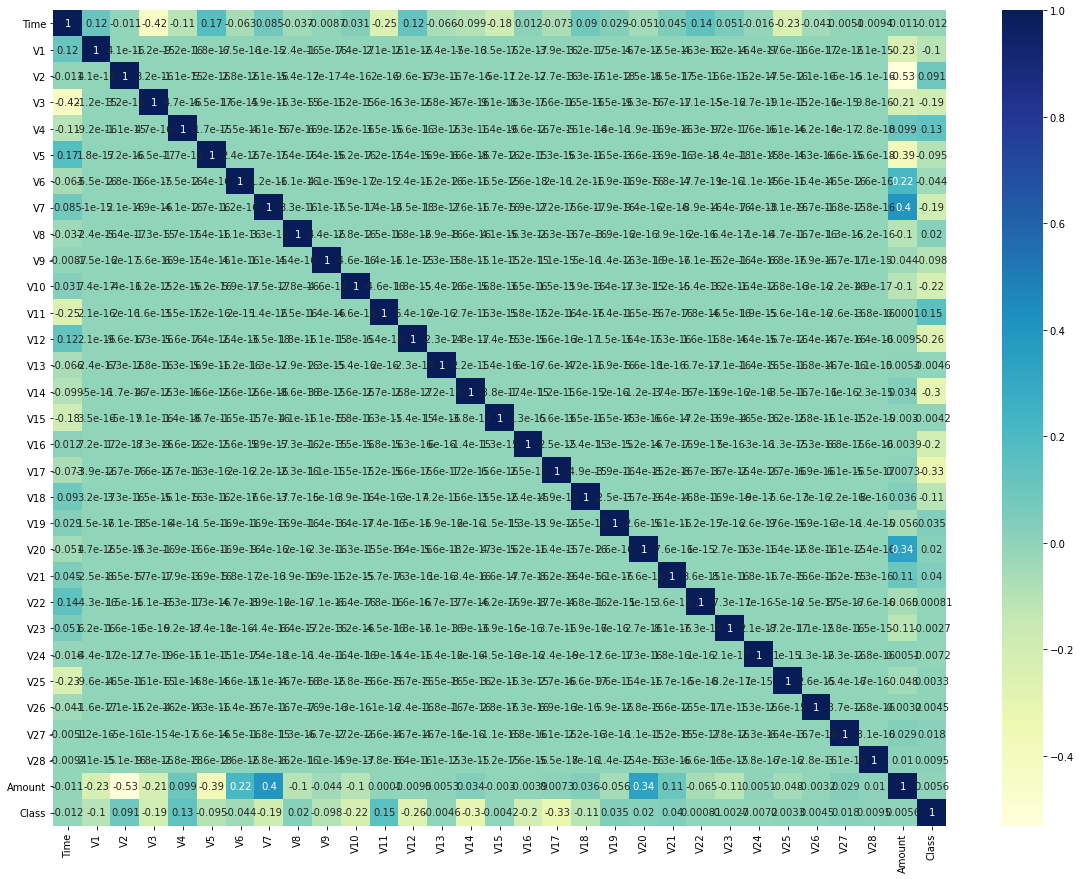

In [6]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True)
plt.plot()

In [7]:
#observe the different feature type present in the data

df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

### Handling Missing Values

In [8]:
## Checking missing values percentage of columns
df.isnull().sum()/len(df)*100

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

We can see there are no columns with missing values.

### Outliers Treatment

We are not performing any outliers treatment as the dataset is already transformed with PCA and hence outliers are already taken care of.

### Class Distributions

Here we will observe the distribution of our classes

In [9]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

In [10]:
print("Normal Class :",normal_share.round(2).astype(str) + "%")
print("Fraud Class :",fraud_share.round(2).astype(str) + "%")

Normal Class : 99.83%
Fraud Class : 0.17%


Here we can see that the fraud class is minority class with 0.17% and hence the data is highly imbalanced.

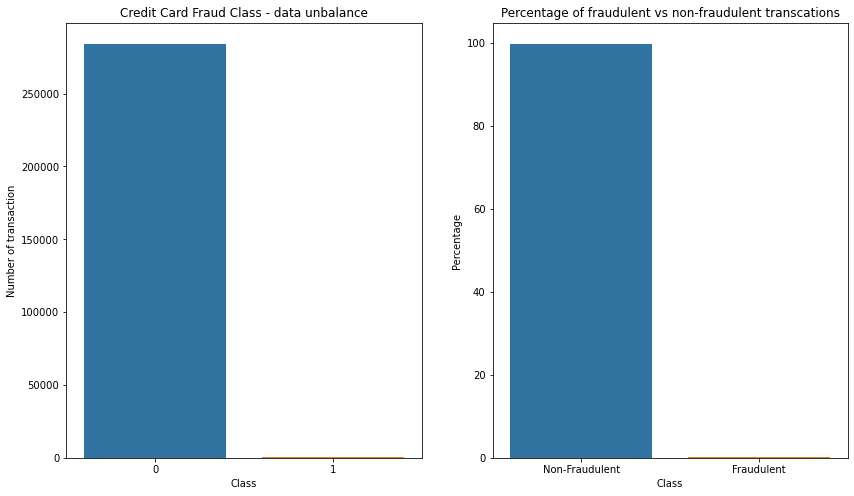

In [11]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

plt.figure(figsize=(14,8))

plt.subplot(1,2,1)
sns.countplot(df["Class"])
plt.ylabel("Number of transaction")
plt.xlabel("Class")
plt.title("Credit Card Fraud Class - data unbalance")

plt.subplot(1,2,2)
fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]} 
df_fraud_percentage = pd.DataFrame(fraud_percentage) 
sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage)
plt.title('Percentage of fraudulent vs non-fraudulent transcations')

plt.show()

The percentage without churn prediction is  99.83 % of the dataset.
The percentage with churn prediction is  0.17 % of the dataset.
The ratio of imbalance is 0.17.
So we have 492 fraudalent transactions out of 284807 total credit card transactions.
Target variable distribution shows that we are dealing with an highly imbalanced problem as there are many more genuine transactions class as compared to the fraudalent transactions. The model would achieve high accuracy as it would mostly predict majority class — transactions which are genuine in our example. To overcome this we will use other metrics for model evaluation such as ROC-AUC , precision and recall etc.

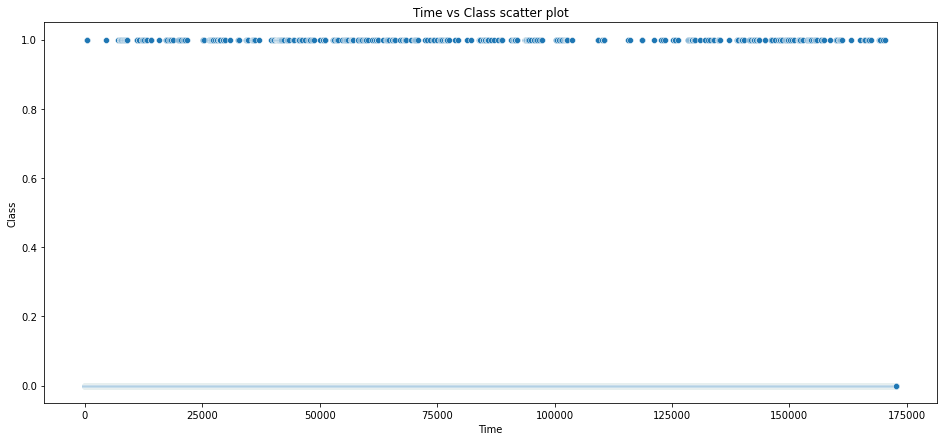

In [12]:
# Create a scatter plot to observe the distribution of classes with time
plt.figure(figsize=(16,7))
sns.scatterplot(df["Time"], df["Class"])
plt.title("Time vs Class scatter plot")
plt.show()

It looks like there is no pattern is seen from the time of the transaction and class labels.

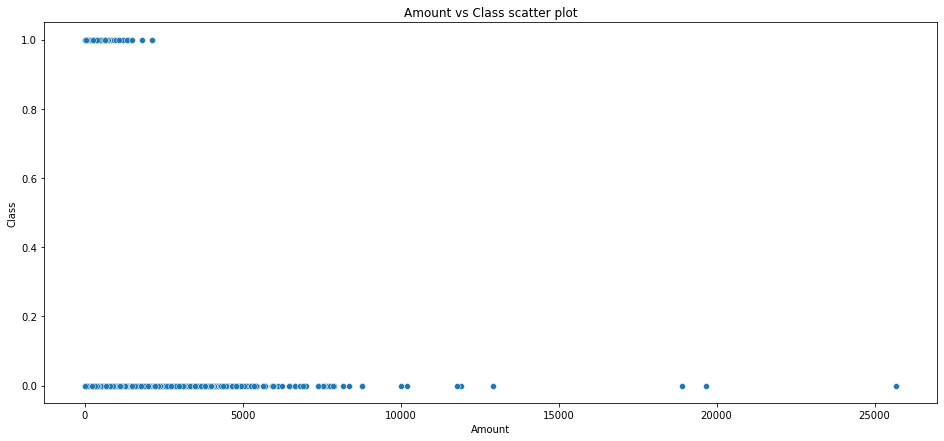

In [13]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.figure(figsize=(16,7))
sns.scatterplot(df["Amount"], df["Class"])
plt.title("Amount vs Class scatter plot")
plt.show()

We can see the fraudlent class has low transaction amount than non fraudlent class.

In [14]:
# Drop unnecessary columns

df = df.drop("Time", axis = 1)

Dropping Time column as this feature is not going to help in the model building.

#### Checking distributions of other features

<Figure size 432x288 with 0 Axes>

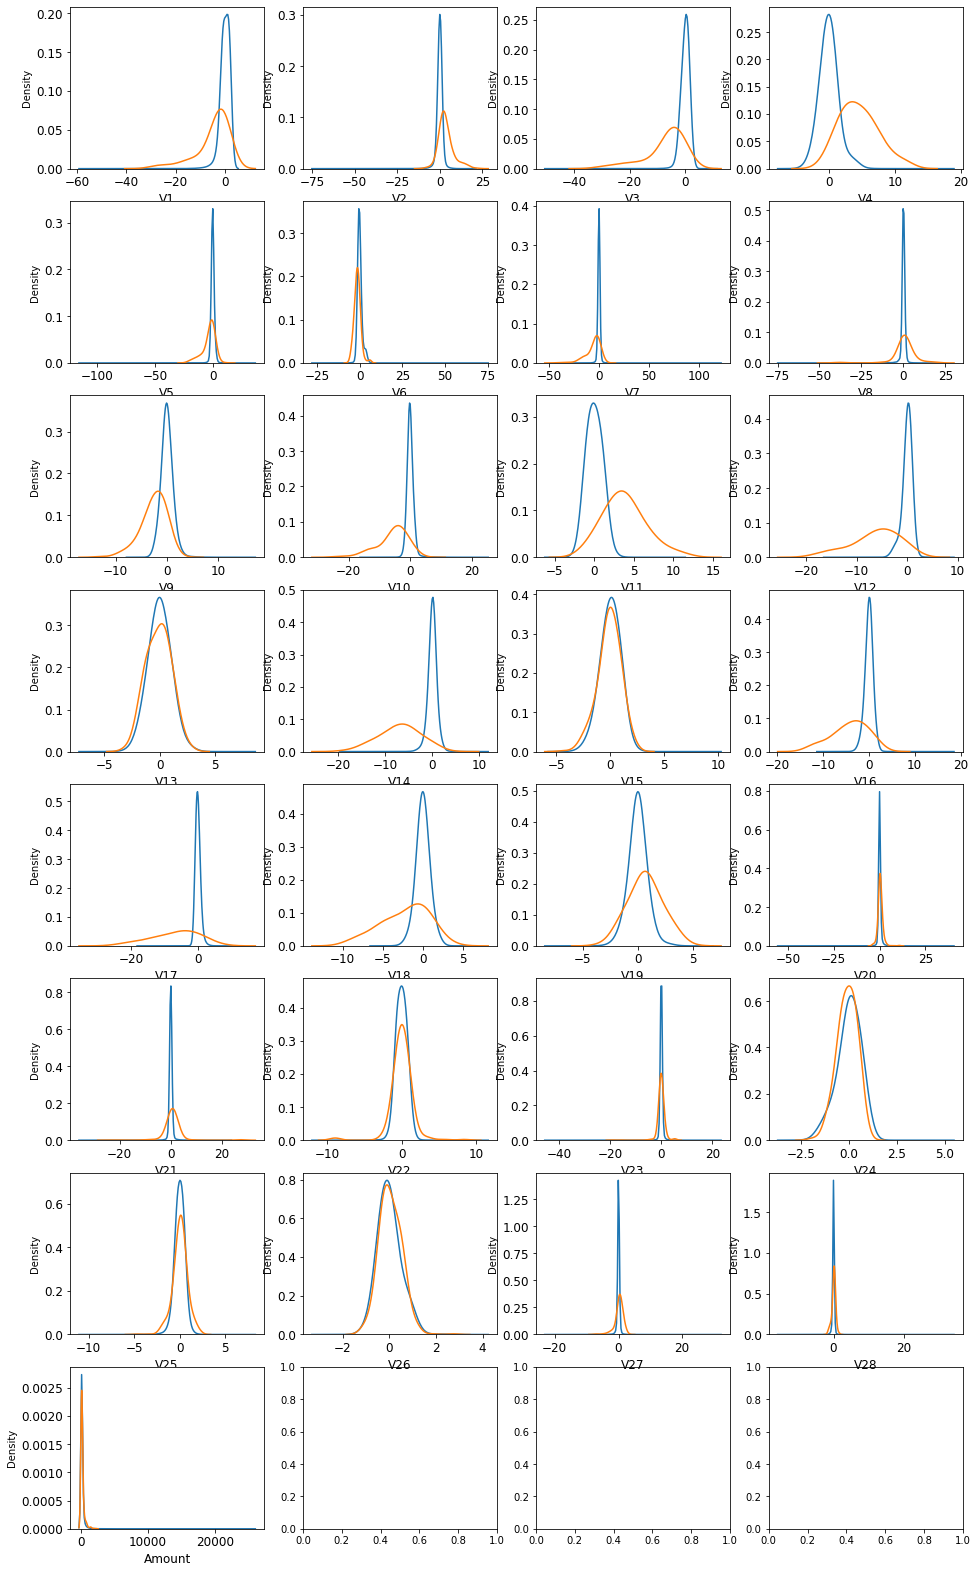

In [15]:
# Plotting all the variable in displot to visualise the distribution
var = list(df.columns.values)
# dropping Class columns from the list
var.remove("Class")

i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="0")
    sns.kdeplot(t1[feature], bw=0.5,label="1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

### Splitting the data into train & test data

In [16]:
y= df["Class"]
X = df.drop("Class", axis = 1)

In [17]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.2, random_state = 42)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [18]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
394
98


### Plotting the distribution of a variable

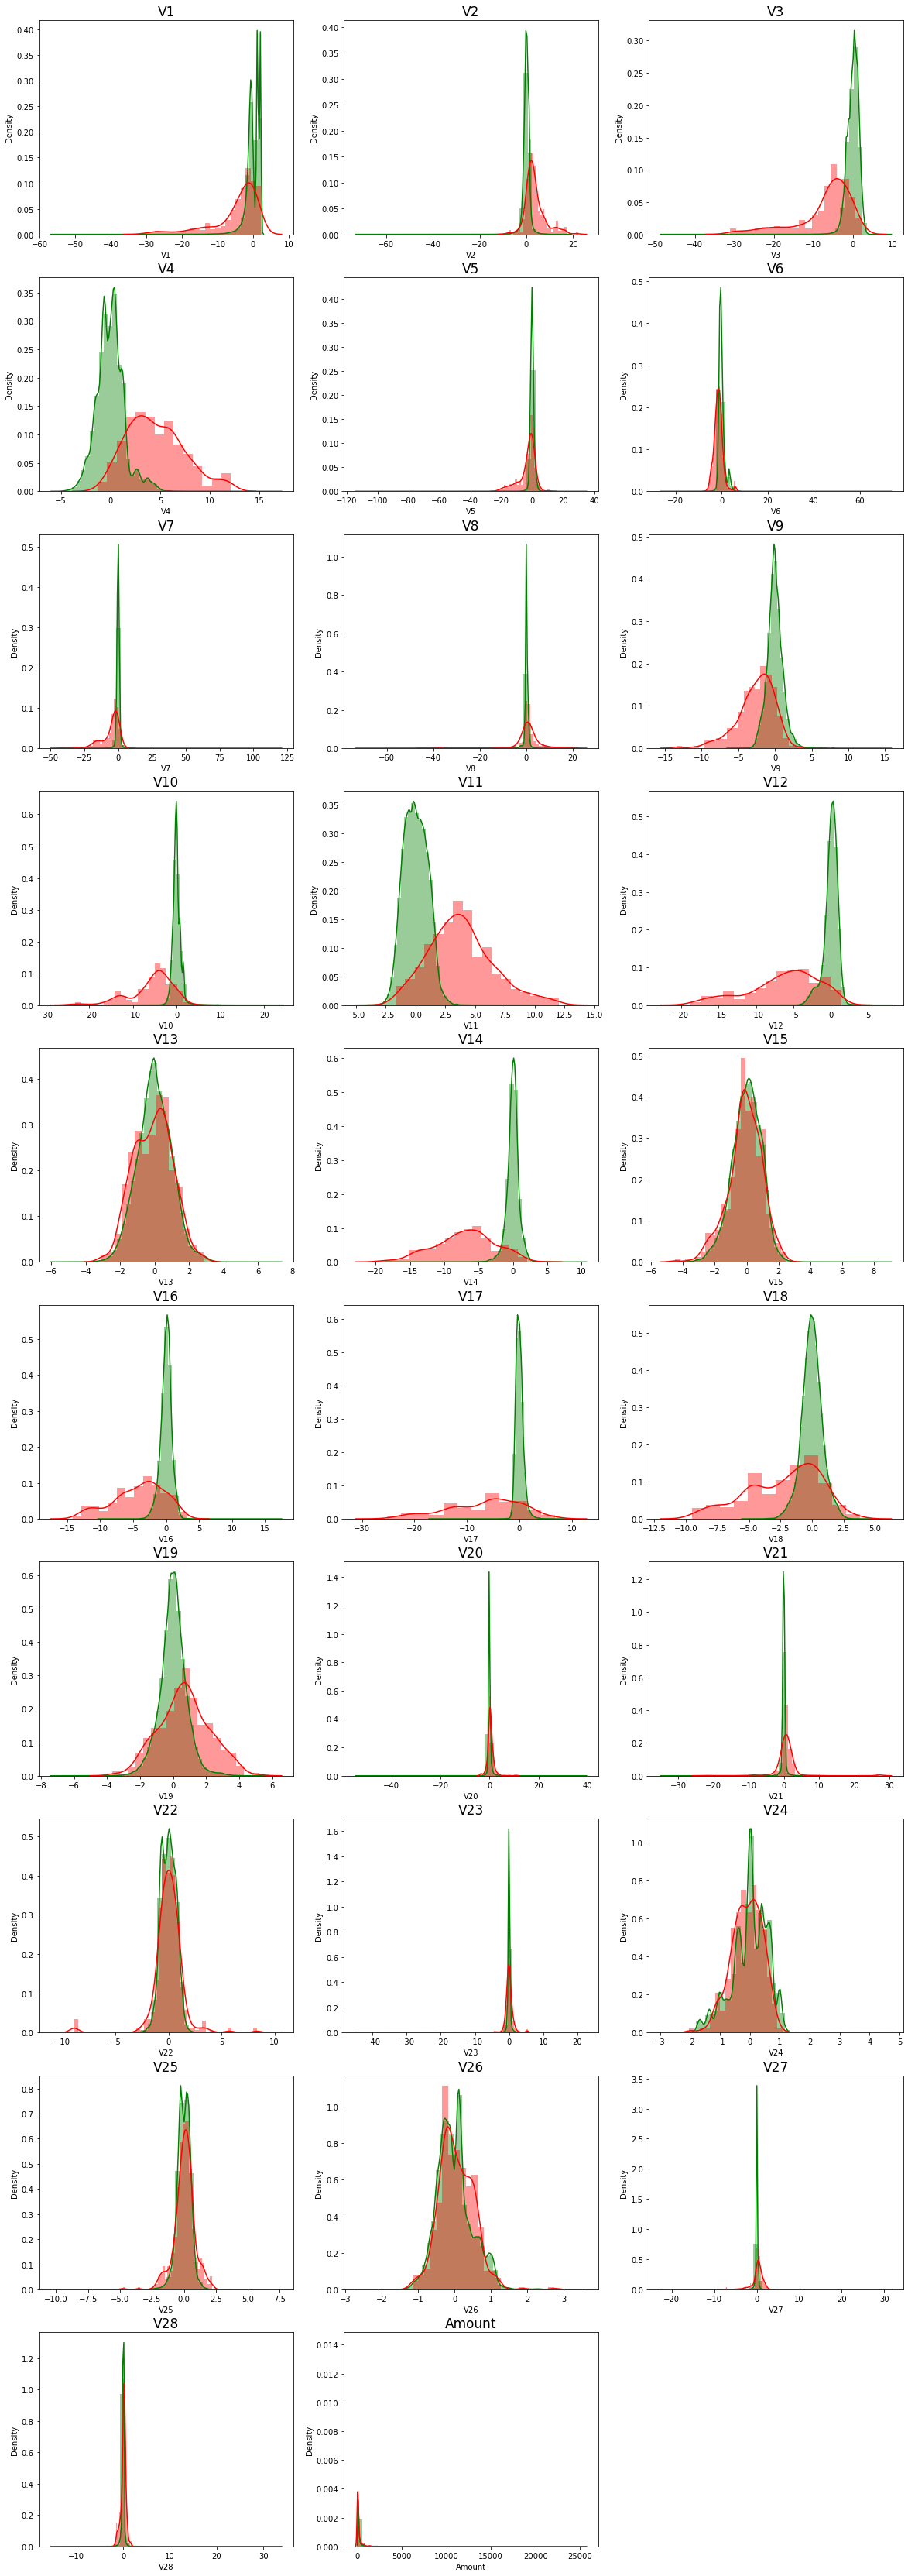

In [19]:
# plot the histogram of a variable from the dataset to see the skewness

cols = list(X.columns.values)
normal_records = df.Class == 0
fraud_records = df.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X[col][normal_records], color='green')
  sns.distplot(X[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

We can see lot of skewness in the many features and we will be calculating the skewness and apply power transformation to remove skewness.

In [20]:
# Lets check the skewness of the features
var = X_train.columns
skew_list = []
for i in var:
    skew_list.append(X_train[i].skew())

tmp = pd.concat([pd.DataFrame(var, columns=["Features"]), pd.DataFrame(skew_list, columns=["Skewness"])], axis=1)
tmp.set_index("Features", inplace=True)
tmp

,Skewness
Features,
V1,-3.306334
V2,-4.779484
V3,-2.247962
V4,0.687574
V5,-2.786851
V6,1.937381
V7,3.152665
V8,-8.639485
V9,0.541869


In [21]:
# Filtering the features which has skewness less than -1 and greater than +1
skewed = tmp.loc[(tmp["Skewness"] > 1) | (tmp["Skewness"] <-1 )].index
print(skewed)

Index(['V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V10', 'V12', 'V14', 'V16',
       'V17', 'V20', 'V21', 'V23', 'V28', 'Amount'],
      dtype='object', name='Features')


In [22]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
pt = preprocessing.PowerTransformer(copy=False)
X_train[skewed] = pt.fit_transform(X_train[skewed])

# Transforming the test data
X_test[skewed] = pt.transform(X_test[skewed])

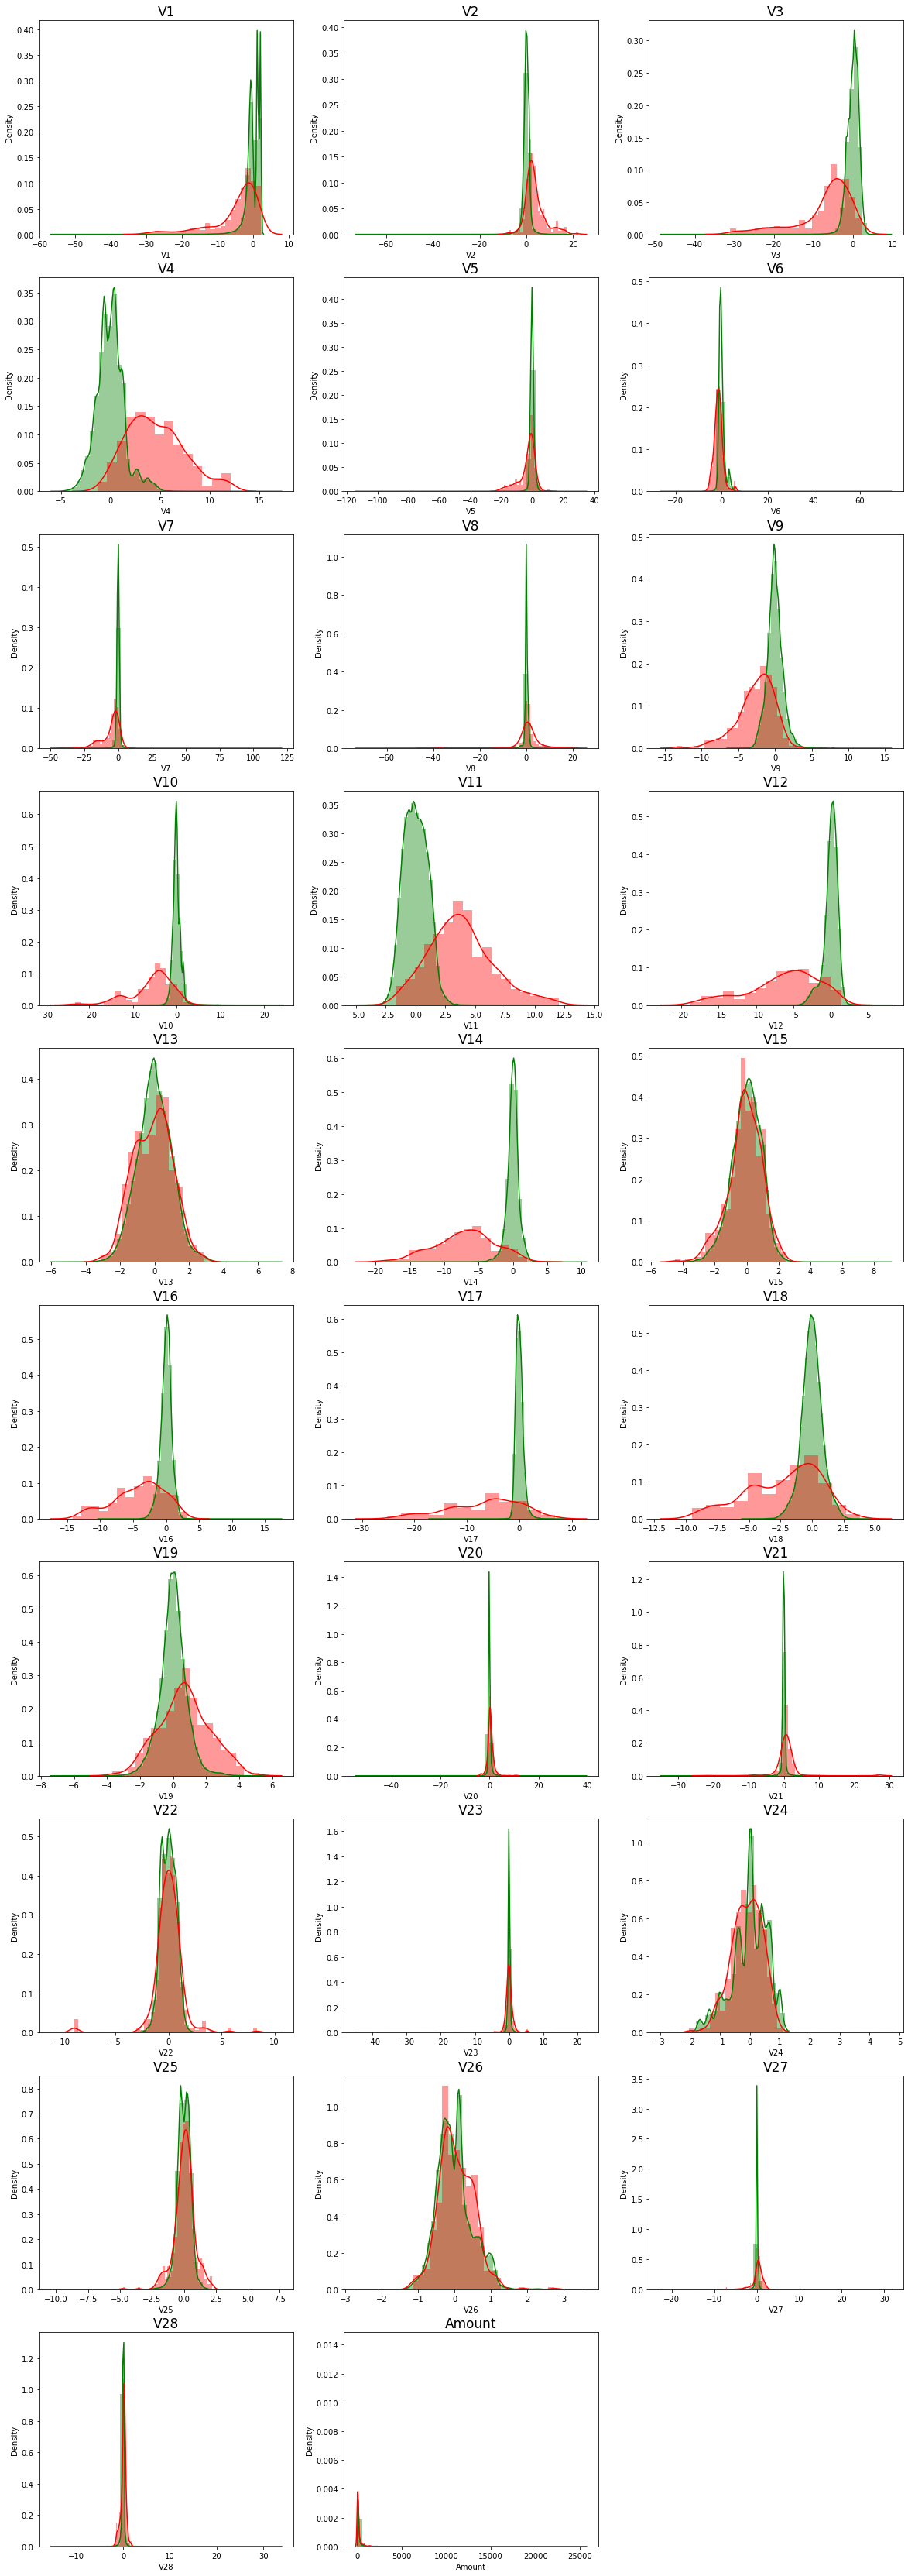

In [23]:
# plot the histogram of a variable from the dataset again to see the result 

cols = list(X.columns.values)
normal_records = df.Class == 0
fraud_records = df.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X[col][normal_records], color='green')
  sns.distplot(X[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

In [24]:
var = X_train.columns
skew_list = []
for i in var:
    skew_list.append(X_train[i].skew())

tmp = pd.concat([pd.DataFrame(var, columns=["Features"]), pd.DataFrame(skew_list, columns=["Skewness"])], axis=1)
tmp.set_index("Features", inplace=True)
tmp

,Skewness
Features,
V1,-0.218136
V2,0.336876
V3,-0.079701
V4,0.687574
V5,-1.349420
V6,-2.001738
V7,2.883669
V8,2.382707
V9,0.541869


We can see from the above numbers that the skewness has been reduced significantly.

## Model Building
- Build different models on the imbalanced dataset and see the result

In [25]:
# Logistic Regression
from sklearn import linear_model #import the package

num_C = {"C": [0.01, 0.1, 1, 10, 100, 1000]}  #--> list of values
cv_num = KFold(n_splits=5, shuffle=True, random_state=4)  #--> list of values

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

In [26]:
#perform cross validation

model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = num_C, 
                        scoring= 'roc_auc', 
                        cv = cv_num, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True)

#perform hyperparameter tuning
model_cv.fit(X_train, y_train)

#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.9822671937253249
Best hyperparameters:  {'C': 0.01}


In [27]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.305931,0.047940,0.030822,0.002675,0.01,{'C': 0.01},0.989592,0.971434,0.990678,0.976576,0.983056,0.982267,0.007413,1,0.983699,0.988043,0.984024,0.986179,0.983987,0.985186,0.001682
1,1.683642,0.151941,0.022491,0.006417,0.1,{'C': 0.1},0.985409,0.970849,0.989115,0.972840,0.978807,0.979404,0.007028,2,0.981962,0.986402,0.982255,0.983469,0.982084,0.983234,0.001673
2,2.160631,0.168074,0.030243,0.004822,1,{'C': 1},0.984132,0.970601,0.988622,0.971396,0.977115,0.978373,0.007055,3,0.981172,0.985763,0.981589,0.982517,0.981393,0.982487,0.001701
3,2.221722,0.126631,0.029865,0.001629,10,{'C': 10},0.983974,0.970553,0.988571,0.971181,0.976869,0.978229,0.007077,4,0.981055,0.985683,0.981504,0.982389,0.981305,0.982387,0.001708
4,2.240590,0.114994,0.031764,0.008321,100,{'C': 100},0.983954,0.970549,0.988565,0.971151,0.976841,0.978212,0.007080,5,0.981041,0.985674,0.981496,0.982376,0.981296,0.982377,0.001709
5,1.732985,0.168126,0.018596,0.005231,1000,{'C': 1000},0.983951,0.970549,0.988566,0.971149,0.976839,0.978211,0.007080,6,0.981040,0.985673,0.981495,0.982375,0.981296,0.982376,0.001709


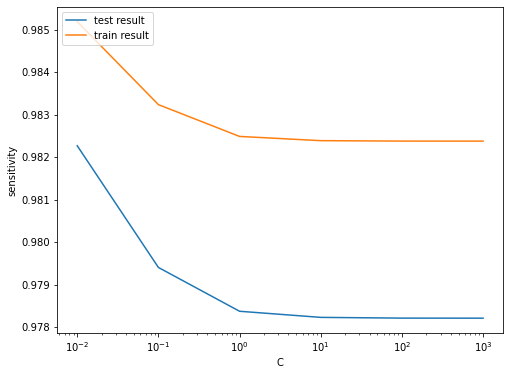

In [28]:
# plot of C versus train and validation scores
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

#### Logistic Regression with optimal C

In [29]:
# Instantiating the model with best C
log_reg_imb_model = LogisticRegression(C=0.01)

# Fitting the model on train dataset
log_reg_imb_model.fit(X_train, y_train)

LogisticRegression(C=0.01)

#### Prediction and model evalution on the train set

In [30]:
# Creating function to display ROC-AUC score, f1 score and classification report
def display_scores(y_test, y_pred):
    '''
    Display ROC-AUC score, f1 score and classification report of a model.
    '''
    print(f"F1 Score: {round(f1_score(y_test, y_pred)*100,2)}%") 
    print(f"Classification Report: \n {classification_report(y_test, y_pred)}")

In [31]:
# Predictions on the train set
y_train_pred = log_reg_imb_model.predict(X_train)

In [32]:
display_scores(y_train, y_train_pred)

F1 Score: 74.47%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.91      0.63      0.74       394

    accuracy                           1.00    227845
   macro avg       0.96      0.81      0.87    227845
weighted avg       1.00      1.00      1.00    227845



In [33]:
# ROC Curve function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [34]:
# Predicted probability
y_train_pred_proba = log_reg_imb_model.predict_proba(X_train)[:,1]

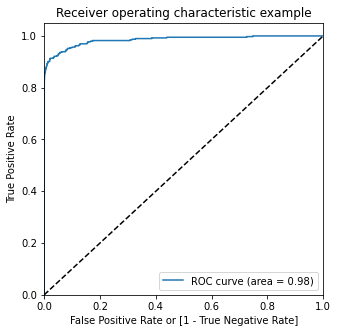

In [35]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)


#### Evaluating the model on the test set

In [36]:
# Making prediction on the test set
y_test_pred = log_reg_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 72.83%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.64      0.73        98

    accuracy                           1.00     56962
   macro avg       0.92      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962



In [37]:
# Predicted probability
y_test_pred_proba = log_reg_imb_model.predict_proba(X_test)[:,1]

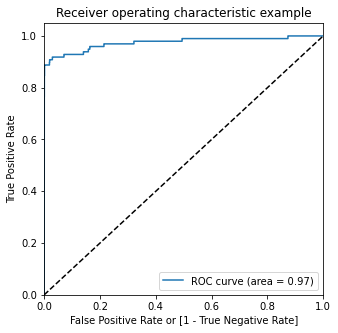

In [38]:
# Predicted probability
y_test_pred_proba = log_reg_imb_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

From the above ROC curve, we can see the model is performing very well.

**MODEL SUMMARY:**

- Train Set
    - ROC: 98%
    - F1 Score: 74.47%
    
- Test Set
    - ROC: 97%
    - F1 Score: 72.83%

### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

### Decision Tree

In [41]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

model_dt_cv = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
model_dt_cv.fit(X_train,y_train)

#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_dt_cv.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_dt_cv.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best ROC AUC score:  0.9359244925074665
Best hyperparameters:  {'max_depth': 5, 'min_samples_leaf': 100, 'min_samples_split': 50}


In [42]:
# cv results
cv_results = pd.DataFrame(model_dt_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,2.209122,0.024361,0.019425,0.000718,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.901305,0.934351,0.936853,0.924170,0.016200,8
1,2.172410,0.009353,0.019149,0.000875,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.901295,0.934346,0.944462,0.926701,0.018433,6
2,2.176085,0.011285,0.019330,0.001048,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.928512,0.934740,0.944521,0.935924,0.006589,1
3,2.171189,0.025636,0.018135,0.000392,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.928512,0.934740,0.944521,0.935924,0.006589,1
4,4.294926,0.097724,0.019915,0.000581,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.917061,0.939744,0.920461,0.925755,0.009988,7
5,4.199372,0.014204,0.020140,0.000586,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.917061,0.939752,0.927953,0.928255,0.009266,5
6,4.139335,0.029129,0.020104,0.000505,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.914425,0.940993,0.934414,0.929944,0.011297,4
7,4.155426,0.016515,0.020038,0.000393,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.914474,0.933486,0.956771,0.934910,0.017297,3


In [43]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", model_dt_cv.best_score_)
print(model_dt_cv.best_estimator_)

Best roc_auc:- 0.9359244925074665
DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=50)


#### Decision Tree with Optimal Hyperparameters

In [44]:
# Model with optimal hyperparameters
dt_imb_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)

dt_imb_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=50,
                       random_state=100)

#### Prediction on the train set

In [45]:
# Predictions on the train set
y_train_pred = dt_imb_model.predict(X_train)

In [46]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train)
print(confusion)

[[227451      0]
 [     0    394]]


In [47]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [48]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9991046544800193
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 0.6832298136645963


In [49]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.88      0.56      0.68       394

    accuracy                           1.00    227845
   macro avg       0.94      0.78      0.84    227845
weighted avg       1.00      1.00      1.00    227845



In [50]:
# Predicted probability
y_train_pred_proba = dt_imb_model.predict_proba(X_train)[:,1]

In [51]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
auc

0.9403811903749805

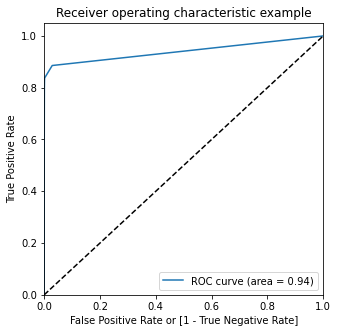

In [52]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

#### Prediction on the test set

In [53]:
# Predictions on the test set
y_test_pred = dt_imb_model.predict(X_test)

In [54]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56850    14]
 [   48    50]]


In [55]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [56]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9989115550718023
Sensitivity:- 0.5102040816326531
Specificity:- 0.9997537985368599
F1-Score:- 0.6832298136645963


In [57]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.78      0.51      0.62        98

    accuracy                           1.00     56962
   macro avg       0.89      0.75      0.81     56962
weighted avg       1.00      1.00      1.00     56962



In [58]:
# Predicted probability
y_test_pred_proba = dt_imb_model.predict_proba(X_test)[:,1]

In [59]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9418186643678292

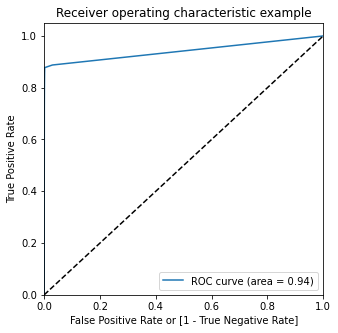

In [60]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

From the above ROC curve, we can see the model is performing very well.

**MODEL SUMMARY:**

- Train Set
    - ROC: 94%
    - F1 Score: 68.32%
    
- Test Set
    - ROC: 94%
    - F1 Score: 68.32%

### Random Forest

In [61]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [62]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 2,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [63]:
grid_search.best_params_

{'max_depth': 5,
 'max_features': 10,
 'min_samples_leaf': 50,
 'min_samples_split': 50,
 'n_estimators': 300}

In [64]:
# model with the best hyperparameters

rfc_imb_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                             max_features=10,
                             n_estimators=300)

In [65]:
# Fit the model
rfc_imb_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=50, n_estimators=300)

#### Prediction on the train set

In [66]:
# Predictions on the train set
y_train_pred = rfc_imb_model.predict(X_train)

In [67]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train)
print(confusion)

[[227451      0]
 [     0    394]]


In [68]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [69]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9993153240141324
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 0.7815126050420167


In [70]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.87      0.71      0.78       394

    accuracy                           1.00    227845
   macro avg       0.94      0.85      0.89    227845
weighted avg       1.00      1.00      1.00    227845



In [71]:
# Predicted probability
y_train_pred_proba = rfc_imb_model.predict_proba(X_train)[:,1]

In [72]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
auc

0.9804147307055392

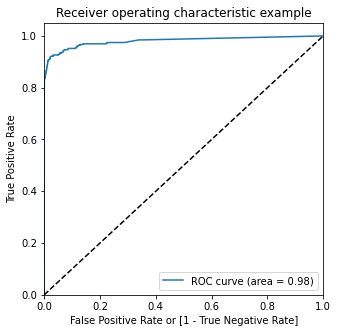

In [73]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

#### Prediction on the test set

In [74]:
# Predictions on the test set
y_test_pred = rfc_imb_model.predict(X_test)

In [75]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56846    18]
 [   25    73]]


In [76]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [77]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9992451107756047
Sensitivity:- 0.7448979591836735
Specificity:- 0.999683455261677
F1-Score:- 0.7815126050420167


In [78]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.80      0.74      0.77        98

    accuracy                           1.00     56962
   macro avg       0.90      0.87      0.89     56962
weighted avg       1.00      1.00      1.00     56962



In [79]:
# Predicted probability
y_test_pred_proba = rfc_imb_model.predict_proba(X_test)[:,1]

In [80]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9681562991685138

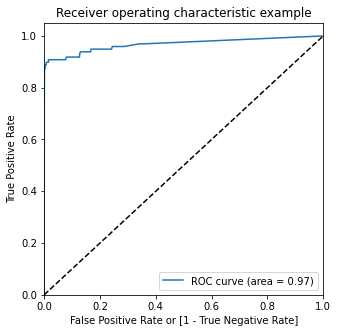

In [81]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

From the above ROC curve, we can see the model is performing very well.

**MODEL SUMMARY:**

- Train Set
    - ROC: 98%
    - F1 Score: 78.15%
    
- Test Set
    - ROC: 96%
    - F1 Score: 78.15%

### XGBoost 

In [82]:
# Importing XGBoost
from xgboost import XGBClassifier

In [83]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)       

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[23:52:06] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:52:15] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:52:26] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used wit

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [84]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,10.026000,0.677990,0.096492,0.009263,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.978261,0.972478,0.988695,0.979811,0.006710,3,0.999823,0.999889,0.999459,0.999724,0.000189
1,16.377135,0.973533,0.123647,0.037372,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.977487,0.978889,0.986185,0.980854,0.003813,2,0.999971,0.999945,0.999898,0.999938,0.000030
2,20.250661,0.695562,0.104561,0.008990,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.975131,0.981514,0.992050,0.982898,0.006976,1,0.999961,0.999819,0.999896,0.999892,0.000058
3,10.274713,0.065232,0.109575,0.011113,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.974969,0.949987,0.972866,0.965940,0.011314,6,0.999958,0.999996,0.999952,0.999968,0.000020
4,14.479135,0.401677,0.103163,0.005762,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.979368,0.962754,0.985959,0.976027,0.009764,5,1.000000,1.000000,1.000000,1.000000,0.000000
5,21.747905,3.305280,0.106621,0.003444,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.972644,0.975997,0.984229,0.977623,0.004868,4,1.000000,1.000000,1.000000,1.000000,0.000000


In [85]:
model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.9}

#### Model with optimal hyperparameters

In [86]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_imb_model = XGBClassifier(params = params)
xgb_imb_model.fit(X_train, y_train)

[00:08:13] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:08:14] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

#### Prediction on the train set

In [87]:
# Predictions on the train set
y_train_pred = xgb_imb_model.predict(X_train)

In [88]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[227451      0]
 [     0    394]]


In [89]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [90]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 1.0


In [91]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845



In [92]:
# Predicted probability
y_train_pred_proba_imb_xgb = xgb_imb_model.predict_proba(X_train)[:,1]

In [93]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgb)
auc

1.0

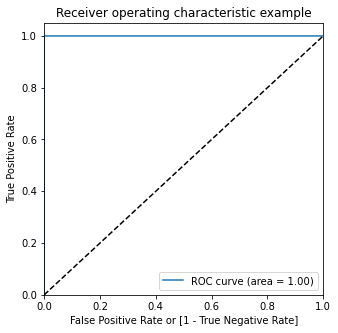

In [94]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_imb_xgb)

#### Prediction on the test set

In [95]:
# Predictions on the test set
y_test_pred = xgb_imb_model.predict(X_test)

In [96]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56857     7]
 [   18    80]]


In [97]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [98]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.9995611109160493
Sensitivity:- 0.8163265306122449
Specificity:- 0.9998768992684299
F1-Score:- 0.8648648648648648


In [99]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.82      0.86        98

    accuracy                           1.00     56962
   macro avg       0.96      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [100]:

# Predicted probability
y_test_pred_proba = xgb_imb_model.predict_proba(X_test)[:,1]

In [101]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9686473562413147

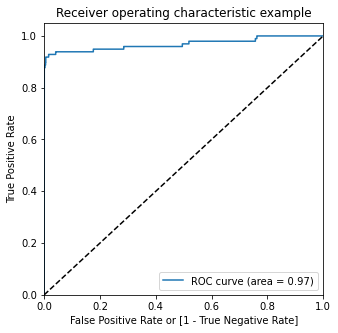

In [102]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

From the above ROC curve, we can see the model is performing very well.

**MODEL SUMMARY:**

- Train Set
    - ROC: 100%
    - F1 Score: 100%
    
- Test Set
    - ROC: 96%
    - F1 Score: 86.48%

### KNN

In [103]:
#Importing library for KNN
from sklearn.neighbors import KNeighborsClassifier

In [104]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'n_neighbors': [3,5,7,9,11,13]}  

#create base KNN model
knn_model = KNeighborsClassifier()

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = knn_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)  

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [105]:
model_cv.best_params_

{'n_neighbors': 13}

#### Model with optimal hyperparameters

In [109]:
params = {'n_neighbors':13}

# fit model on training data
knn_imb_model = KNeighborsClassifier(n_neighbors = 13)
knn_imb_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

#### Prediction on the train set

In [110]:
# Predictions on the train set
y_train_pred = knn_imb_model.predict(X_train)

In [111]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[227416     35]
 [    91    303]]


In [112]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [113]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9994469924729531
Sensitivity:- 0.7690355329949239
Specificity:- 0.9998461207029207
F1-Score:- 0.8278688524590164


In [114]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.90      0.77      0.83       394

    accuracy                           1.00    227845
   macro avg       0.95      0.88      0.91    227845
weighted avg       1.00      1.00      1.00    227845



In [115]:
# Predicted probability
y_train_pred_proba_imb_knn = knn_imb_model.predict_proba(X_train)[:,1]

In [116]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba_imb_knn)
auc

0.9997808363789494

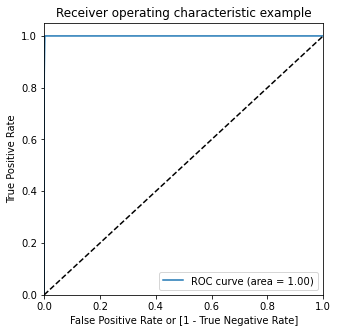

In [117]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_imb_knn)

#### Prediction on the test set

In [118]:
# Predictions on the test set
y_test_pred = knn_imb_model.predict(X_test)

In [119]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56852    12]
 [   26    72]]


In [120]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [121]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.9993328885923949
Sensitivity:- 0.7346938775510204
Specificity:- 0.9997889701744513
F1-Score:- 0.7912087912087913


In [122]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.73      0.79        98

    accuracy                           1.00     56962
   macro avg       0.93      0.87      0.90     56962
weighted avg       1.00      1.00      1.00     56962



In [123]:

# Predicted probability
y_test_pred_proba_imb_knn = knn_imb_model.predict_proba(X_test)[:,1]

In [124]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba_imb_knn)
auc

0.9487390429582075

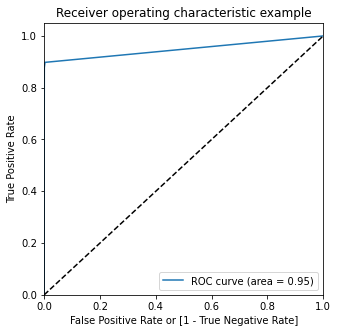

In [125]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba_imb_knn)

From the above ROC curve, we can see the model is performing well.

**MODEL SUMMARY:**

- Train Set
    - ROC: 100%
    - F1 Score: 82.78%
    
- Test Set
    - ROC: 95%
    - F1 Score: 79.12%

### SVM

In [126]:
#importing library for SVM
from sklearn.svm import SVC

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','sigmoid']}

# specify model
SVM_model = SVC()

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = SVM_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'sigmoid']},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [127]:
model_cv.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

#### Model with optimal hyperparameters

In [139]:
params = {'C': 1, 'gamma': 1, 'kernel': 'rbf'}

# fit model on training data
svm_imb_model = SVC(C=1,gamma=1,kernel='rbf',probability=True)
svm_imb_model.fit(X_train, y_train)

SVC(C=1, gamma=1, probability=True)

#### Prediction on the train set

In [140]:
# Predictions on the train set
y_train_pred = svm_imb_model.predict(X_train)

In [141]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[227451      0]
 [    21    373]]


In [142]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [143]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9999078320788255
Sensitivity:- 0.9467005076142132
Specificity:- 1.0
F1-Score:- 0.9726205997392439


In [144]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      0.95      0.97       394

    accuracy                           1.00    227845
   macro avg       1.00      0.97      0.99    227845
weighted avg       1.00      1.00      1.00    227845



In [145]:
# Predicted probability
y_train_pred_proba_imb_svm = svm_imb_model.predict_proba(X_train)[:,1]

In [146]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba_imb_svm)
auc

1.0

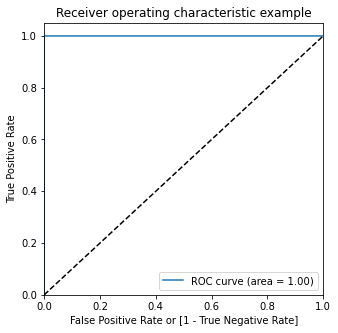

In [148]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_imb_svm)

#### Prediction on the train set

In [149]:
# Predictions on the test set
y_test_pred = svm_imb_model.predict(X_test)

In [150]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56864     0]
 [   90     8]]


In [151]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [152]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.9984199992977775
Sensitivity:- 0.08163265306122448
Specificity:- 1.0
F1-Score:- 0.15094339622641506


In [153]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       1.00      0.08      0.15        98

    accuracy                           1.00     56962
   macro avg       1.00      0.54      0.58     56962
weighted avg       1.00      1.00      1.00     56962



In [154]:

# Predicted probability
y_test_pred_proba_imb_svm = knn_imb_model.predict_proba(X_test)[:,1]

In [155]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba_imb_svm)
auc

0.9487390429582075

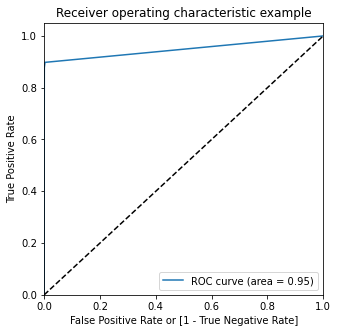

In [156]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba_imb_svm)

From the above ROC curve, we can see the model is performing well.

**MODEL SUMMARY:**

- Train Set
    - ROC: 100%
    - F1 Score: 97.26%
    
- Test Set
    - ROC: 95%
    - F1 Score: 0.15%

#### Choosing best model on the imbalanced data


We can see that among all the models we tried (Logistic, XGBoost, Decision Tree,Random Forest,KNN and SVM), almost all of them have performed well. More specifically Logistic regression,Random Forest and XGBoost performed best in terms of ROC-AUC score.

Proceeding with XGBoost model as it has acheived the highest f1 score on test 86.48 among all other models,train ROC of 100%, and test ROC(96%).

#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [160]:
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

clf = XGBClassifier(params = params)  #initialise the model with optimum hyperparameters
clf.fit(X_train, y_train)
#print the evaluation score on the X_test by choosing the best evaluation metric

# Making prediction on the test set
y_test_pred = clf.predict(X_test)
display_scores(y_test, y_test_pred)

[14:42:39] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:42:39] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
F1 Score: 86.49%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.82      0.86        98

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 14
3rd Top var = 10


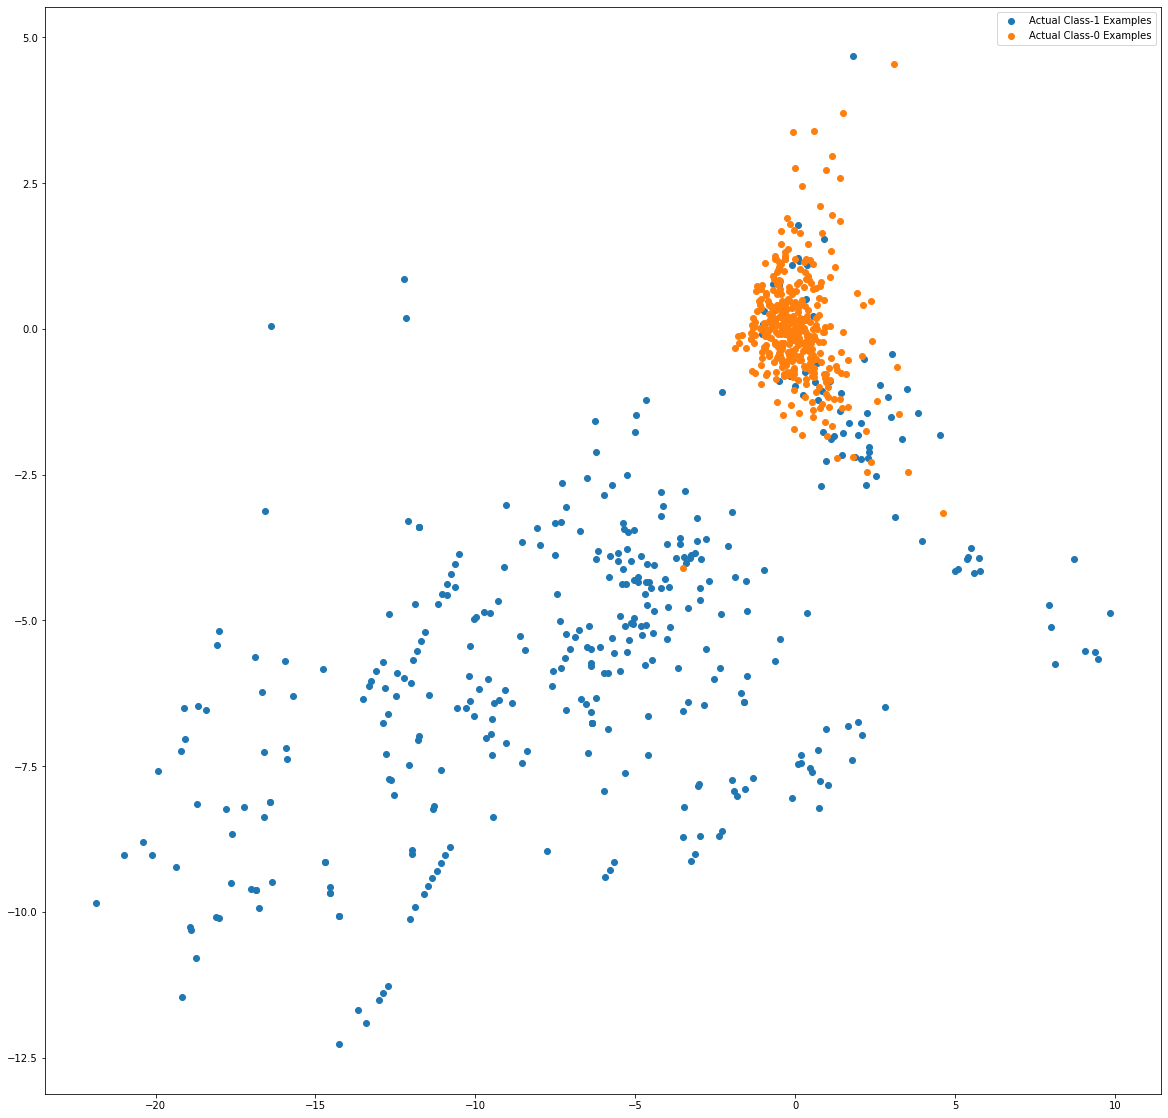

In [161]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

#### Print the FPR,TPR & select the best threshold from the roc curve for the best model


In [162]:
print('Train auc =', metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgb))
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred_proba_imb_xgb)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Train auc = 1.0
Threshold= 0.86015356


We can see that the threshold is 0.86, for which the TPR is the highest and FPR is the lowest and we got the best ROC score.

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

In [163]:
# Logistic Regression
from sklearn import linear_model #import the package

num_C = {"C": [0.01, 0.1, 1, 10, 100, 1000]}  #--> list of values
cv_num = KFold(n_splits=5, shuffle=True, random_state=4)  #--> list of values

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

### Random Oversampling

In [166]:
from imblearn.over_sampling import RandomOverSampler #- import the packages

# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train, y_train)


In [167]:
from collections import Counter
# Before sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_over))


Before sampling class distribution:- Counter({0: 227451, 1: 394})
New class distribution:- Counter({0: 227451, 1: 227451})


### 1. Logistic Regression with Random Oversampling

In [168]:
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = num_C, 
                        scoring= 'roc_auc', 
                        cv = cv_num, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True)

#perform hyperparameter tuning
model_cv.fit(X_over, y_over)

#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)

#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.9883212825350108
Best hyperparameters:  {'C': 100}


In [169]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,6.756186,0.146860,0.055767,0.009256,0.01,{'C': 0.01},0.987957,0.988148,0.988415,0.988153,0.988257,0.988186,0.000150,6,0.988232,0.988180,0.988138,0.988262,0.988187,0.988200,0.000043
1,6.252289,0.697633,0.058999,0.010524,0.1,{'C': 0.1},0.988067,0.988285,0.988521,0.988281,0.988379,0.988307,0.000148,5,0.988352,0.988294,0.988259,0.988384,0.988306,0.988319,0.000044
2,5.443919,0.049523,0.062962,0.005362,1,{'C': 1},0.988080,0.988298,0.988533,0.988294,0.988393,0.988320,0.000148,4,0.988366,0.988309,0.988272,0.988398,0.988319,0.988333,0.000044
3,5.547989,0.054472,0.102755,0.018423,10,{'C': 10},0.988082,0.988299,0.988534,0.988296,0.988394,0.988321,0.000148,3,0.988368,0.988310,0.988273,0.988400,0.988320,0.988334,0.000045
4,5.315147,0.743663,0.069749,0.017706,100,{'C': 100},0.988082,0.988299,0.988535,0.988296,0.988395,0.988321,0.000148,1,0.988368,0.988310,0.988273,0.988400,0.988320,0.988334,0.000045
5,4.115974,0.067775,0.064660,0.013908,1000,{'C': 1000},0.988082,0.988299,0.988535,0.988296,0.988394,0.988321,0.000148,2,0.988368,0.988310,0.988273,0.988400,0.988320,0.988334,0.000045


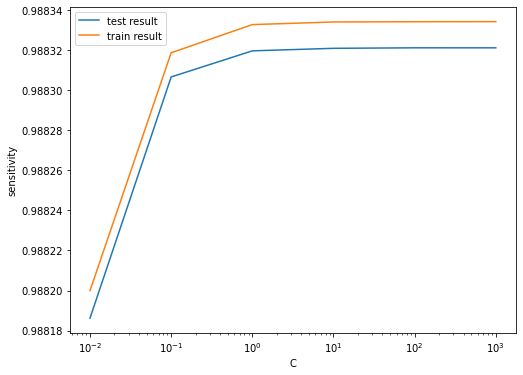

In [170]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

#### Logistic Regression with hyperparameter tuning

In [171]:
model_cv.best_params_

{'C': 100}

In [172]:
# Instantiating the model with best hyperparameters
logreg_over = LogisticRegression(C=1000)

# Fitting the model with train data
logreg_over_model = logreg_over.fit(X_over, y_over)

#### Evaluating the model on train data

In [173]:
# Predictions on the train set
y_train_pred = logreg_over_model.predict(X_over)

In [174]:
# Printing scores
display_scores(y_over, y_train_pred)

F1 Score: 94.96%
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95    227451
           1       0.97      0.93      0.95    227451

    accuracy                           0.95    454902
   macro avg       0.95      0.95      0.95    454902
weighted avg       0.95      0.95      0.95    454902



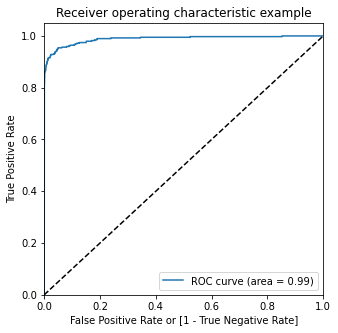

In [175]:
# Predicted probability
y_train_pred_proba = logreg_over_model.predict_proba(X_over)[:,1]
# Plot the ROC curve
draw_roc(y_over, y_train_pred_proba)

#### Evaluating on test data

In [176]:
# Evaluating on test data
y_test_pred = logreg_over_model.predict(X_test)

# Printing the scores
display_scores(y_test, y_test_pred)

F1 Score: 10.22%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.54     56962
weighted avg       1.00      0.97      0.98     56962



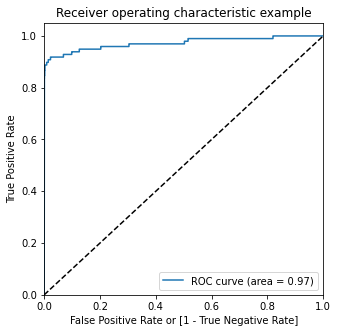

In [177]:
# Predicted probability
y_test_pred_proba = logreg_over_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**MODEL SUMMARY:**

- Train Set
    - ROC: 99%
    - F1 Score: 94.96%
    
- Test Set
    - ROC: 97%
    - F1 Score: 10.22%

#### 2. Decision Tree with Random Oversampling

In [178]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_over,y_over)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [179]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9993692089753147
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100)


### Decision Tree with optimal hyperparameters

In [180]:
# Model with optimal hyperparameters
dt_over_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=100)


In [182]:
dt_over_model.fit(X_over, y_over)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100, random_state=100)

#### Model evatuation on train data


In [183]:
# Predictions on the train set
y_train_pred = dt_over_model.predict(X_over)
display_scores(y_over, y_train_pred)

F1 Score: 99.42%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    227451
           1       0.99      1.00      0.99    227451

    accuracy                           0.99    454902
   macro avg       0.99      0.99      0.99    454902
weighted avg       0.99      0.99      0.99    454902



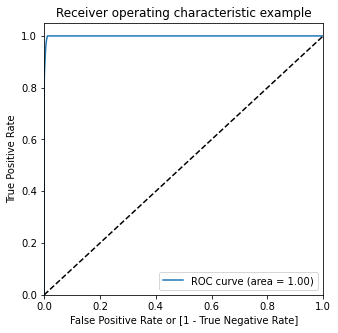

In [184]:
# Predicted probability
y_train_pred_proba = dt_over_model.predict_proba(X_over)[:,1]
# Plot the ROC curve
draw_roc(y_over, y_train_pred_proba)

#### Predictions on the test set

In [185]:
# Evaluating model on the test data
y_test_pred = dt_over_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 17.9%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.10      0.83      0.18        98

    accuracy                           0.99     56962
   macro avg       0.55      0.91      0.59     56962
weighted avg       1.00      0.99      0.99     56962



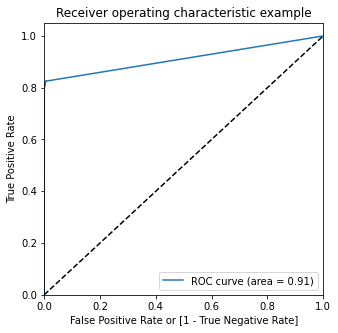

In [186]:
# Predicted probability
y_test_pred_proba = dt_over_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**MODEL SUMMARY:**

- Train Set
    - ROC: 100%
    - F1 Score: 99.42%
    
- Test Set
    - ROC: 91%
    - F1 Score: 17.9%

### 3. XGBoost with Random Oversampling

In [191]:
# creating a KFold object 
folds = 4

# specify range of hyperparameters
param_grid = {'max_depth':[2,5],
              'n_estimators':[100,200],
            'learning_rate': [0.1, 0.6], 
             'subsample': [0.3, 0.6]}          


# specify model
xgb_model = XGBClassifier()

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 2,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_over, y_over)

Fitting 4 folds for each of 16 candidates, totalling 64 fits
[15:30:44] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.1, max_depth=2, n_estimators=100, subsample=0.3; total time=   9.0s
[15:30:54] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.1, max_depth=2, n_estimators=100, subsample=0.3; total time=  16.5s
[15:31:10] WARNING: /opt/concou

[15:36:33] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.3; total time=  21.4s
[15:36:55] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.3; total time=  22.2s
[15:37:18] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/

[CV] END learning_rate=0.6, max_depth=2, n_estimators=100, subsample=0.6; total time=  12.5s
[15:46:44] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.6, max_depth=2, n_estimators=100, subsample=0.6; total time=  12.9s
[15:46:58] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.6, max_depth=2, n_estimators=100, subsample=0.6; total time=  12.5s

[15:52:49] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.6, max_depth=5, n_estimators=100, subsample=0.6; total time=  23.1s
[15:53:13] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.6, max_depth=5, n_estimators=200, subsample=0.3; total time=  31.9s
[15:53:45] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [192]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,11.698351,2.979029,0.146354,0.020096,0.1,2,100,0.3,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",0.998600,0.998396,0.998563,0.998428,0.998497,0.000086,15,0.998514,0.998522,0.998599,0.998404,0.998510,6.946194e-05
1,13.729525,0.601336,0.130304,0.002571,0.1,2,100,0.6,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",0.998626,0.998392,0.998448,0.998427,0.998473,0.000091,16,0.998543,0.998521,0.998480,0.998409,0.998488,5.094850e-05
2,19.895833,0.686676,0.154021,0.005288,0.1,2,200,0.3,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",0.999659,0.999621,0.999625,0.999620,0.999631,0.000016,13,0.999640,0.999659,0.999650,0.999608,0.999639,1.943333e-05
3,28.870674,2.634659,0.162071,0.019418,0.1,2,200,0.6,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",0.999636,0.999589,0.999633,0.999639,0.999624,0.000021,14,0.999623,0.999639,0.999645,0.999627,0.999633,8.794663e-06
4,21.265673,0.448045,0.166635,0.010849,0.1,5,100,0.3,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.999975,0.999895,0.999954,0.999956,0.999945,0.000030,10,0.999959,0.999967,0.999958,0.999956,0.999960,4.119740e-06
5,29.685337,0.802128,0.158902,0.005517,0.1,5,100,0.6,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.999981,0.999911,0.999950,0.999953,0.999949,0.000025,9,0.999963,0.999983,0.999943,0.999956,0.999961,1.434025e-05
6,40.034936,0.599790,0.211742,0.007675,0.1,5,200,0.3,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",1.000000,0.999957,0.999996,0.999990,0.999985,0.000017,7,1.000000,0.999998,1.000000,1.000000,0.999999,6.902328e-07
7,56.926797,0.711722,0.210045,0.006943,0.1,5,200,0.6,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",1.000000,0.999962,0.999996,0.999989,0.999987,0.000015,5,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
8,9.164855,0.167224,0.125158,0.002551,0.6,2,100,0.3,"{'learning_rate': 0.6, 'max_depth': 2, 'n_esti...",0.999950,0.999904,0.999942,0.999959,0.999939,0.000021,12,0.999939,0.999961,0.999962,0.999950,0.999953,9.322812e-06
9,12.803774,0.498987,0.136126,0.016995,0.6,2,100,0.6,"{'learning_rate': 0.6, 'max_depth': 2, 'n_esti...",0.999977,0.999906,0.999930,0.999944,0.999939,0.000025,11,0.999954,0.999967,0.999950,0.999951,0.999955,7.001022e-06


In [193]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9999947087296994
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.6, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [194]:
model_cv.best_params_

{'learning_rate': 0.6, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.6}

#### XGBoost with optimal hyperparameter

In [195]:
# chosen hyperparameters
params = {'learning_rate': 0.6,
          'max_depth': 5, 
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
xgb_over_model = XGBClassifier(params = params)
xgb_over_model.fit(X_over, y_over)

[16:35:17] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:35:17] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              params={'learning_rate': 0.6, 'max_depth': 5, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

#### Model evaluation on train data

In [196]:
# Predictions on the train set
y_train_pred = xgb_over_model.predict(X_over)

display_scores(y_over, y_train_pred)

F1 Score: 100.0%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902



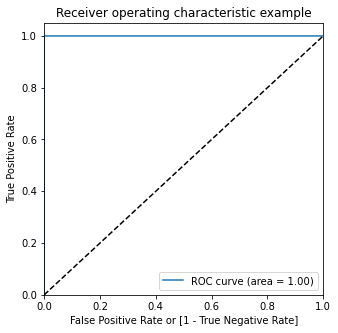

In [197]:
# Predicted probability
y_train_pred_proba = xgb_over_model.predict_proba(X_over)[:,1]

# Plot the ROC curve
draw_roc(y_over, y_train_pred_proba)

#### Model evaluation on the test set

In [198]:
y_pred = xgb_over_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 85.86%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.84      0.86        98

    accuracy                           1.00     56962
   macro avg       0.94      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962



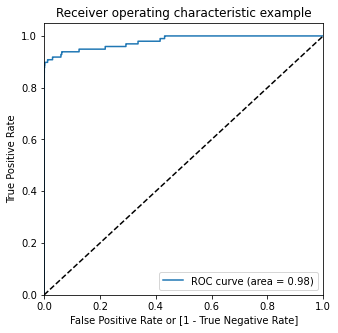

In [199]:
# Predicted probability
y_test_pred_proba = xgb_over_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**MODEL SUMMARY:**

- Train Set
    - ROC: 100%
    - F1 Score: 100%
    
- Test Set
    - ROC: 98%
    - F1 Score: 85.86%

### 3. RandomForest with Random Oversampling

In [201]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
model_cv = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 4,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
model_cv.fit(X_over, y_over)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [202]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,158.517312,0.217425,0.971530,0.026670,5,10,50,50,100,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.974535,0.967940,0.971202,0.969883,0.970890,0.002403,16,0.973111,0.968644,0.971185,0.970959,0.970975,0.001584
1,331.490620,0.146680,1.604438,0.014134,5,10,50,50,200,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.967905,0.970543,0.971079,0.968934,0.969615,0.001264,22,0.966788,0.971065,0.970842,0.969816,0.969628,0.001706
2,480.594379,0.250949,2.406634,0.015941,5,10,50,50,300,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.973445,0.969048,0.971132,0.970244,0.970967,0.001610,15,0.971929,0.969954,0.971056,0.971405,0.971086,0.000724
3,155.098109,0.141563,0.861241,0.003554,5,10,50,100,100,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.973383,0.971818,0.971027,0.970112,0.971585,0.001201,13,0.972070,0.972431,0.970769,0.971150,0.971605,0.000672
4,313.823766,0.270714,2.033135,0.019739,5,10,50,100,200,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.968072,0.970262,0.972319,0.966190,0.969211,0.002301,24,0.966794,0.971012,0.972220,0.967407,0.969358,0.002308
5,486.007845,0.371156,2.491719,0.020871,5,10,50,100,300,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.974720,0.971554,0.972530,0.966287,0.971273,0.003098,14,0.973193,0.972281,0.972451,0.967451,0.971344,0.002274
6,156.661485,0.300602,0.849310,0.006052,5,10,100,50,100,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.968037,0.970341,0.970341,0.971352,0.970018,0.001216,19,0.966803,0.971150,0.969857,0.972334,0.970036,0.002062
7,321.470680,0.156433,1.652705,0.008788,5,10,100,50,200,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.968028,0.969092,0.970956,0.968934,0.969253,0.001064,23,0.966750,0.970039,0.970918,0.970115,0.969456,0.001599
8,474.597908,0.337389,2.588001,0.011788,5,10,100,50,300,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.970666,0.970341,0.969980,0.967676,0.969666,0.001174,21,0.969248,0.971132,0.969678,0.968729,0.969697,0.000894
9,157.696522,0.484815,0.891375,0.013020,5,10,100,100,100,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.966498,0.969084,0.973445,0.970051,0.969769,0.002488,20,0.965185,0.969810,0.973471,0.971053,0.969880,0.003013


In [203]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9746318961286344
RandomForestClassifier(max_depth=5, max_features=20, min_samples_leaf=50,
                       min_samples_split=50)


In [204]:
model_cv.best_params_

{'max_depth': 5,
 'max_features': 20,
 'min_samples_leaf': 50,
 'min_samples_split': 50,
 'n_estimators': 100}

#### RandomForest with optimal hyperparameter

In [207]:
# chosen hyperparameters
params = {'max_depth': 5,
          'max_features': 20,
          'min_samples_leaf': 50,
          'min_samples_split': 50,
          'n_estimators':100}

# fit model on training data
rf_over_model = RandomForestClassifier(max_depth = 5,max_features=20,min_samples_leaf=50,min_samples_split=50,n_estimators=100)
rf_over_model.fit(X_over, y_over)

RandomForestClassifier(max_depth=5, max_features=20, min_samples_leaf=50,
                       min_samples_split=50)

#### Model evaluation on train data

In [208]:
# Predictions on the train set
y_train_pred = rf_over_model.predict(X_over)

display_scores(y_over, y_train_pred)

F1 Score: 97.34%
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97    227451
           1       0.99      0.96      0.97    227451

    accuracy                           0.97    454902
   macro avg       0.97      0.97      0.97    454902
weighted avg       0.97      0.97      0.97    454902



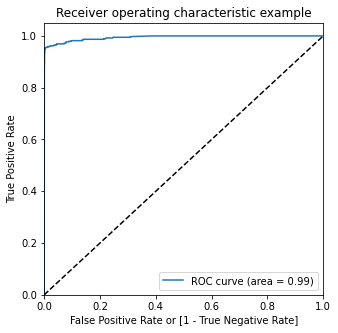

In [209]:
# Predicted probability
y_train_pred_proba = rf_over_model.predict_proba(X_over)[:,1]

# Plot the ROC curve
draw_roc(y_over, y_train_pred_proba)

#### Model evaluation on test data

In [210]:
y_pred = rf_over_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 23.14%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.13      0.86      0.23        98

    accuracy                           0.99     56962
   macro avg       0.57      0.92      0.61     56962
weighted avg       1.00      0.99      0.99     56962



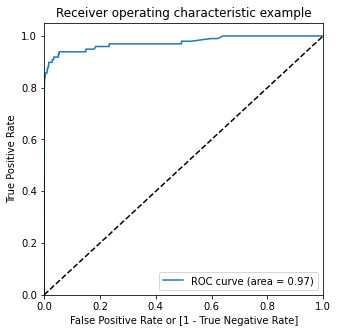

In [211]:
# Predicted probability
y_test_pred_proba = rf_over_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**MODEL SUMMARY:**

- Train Set
    - ROC: 99%
    - F1 Score: 97.34%
    
- Test Set
    - ROC: 97%
    - F1 Score: 23.14%

### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

## SMOTE (Synthetic Minority Oversampling Technique)

### Print the class distribution after applying SMOTE 

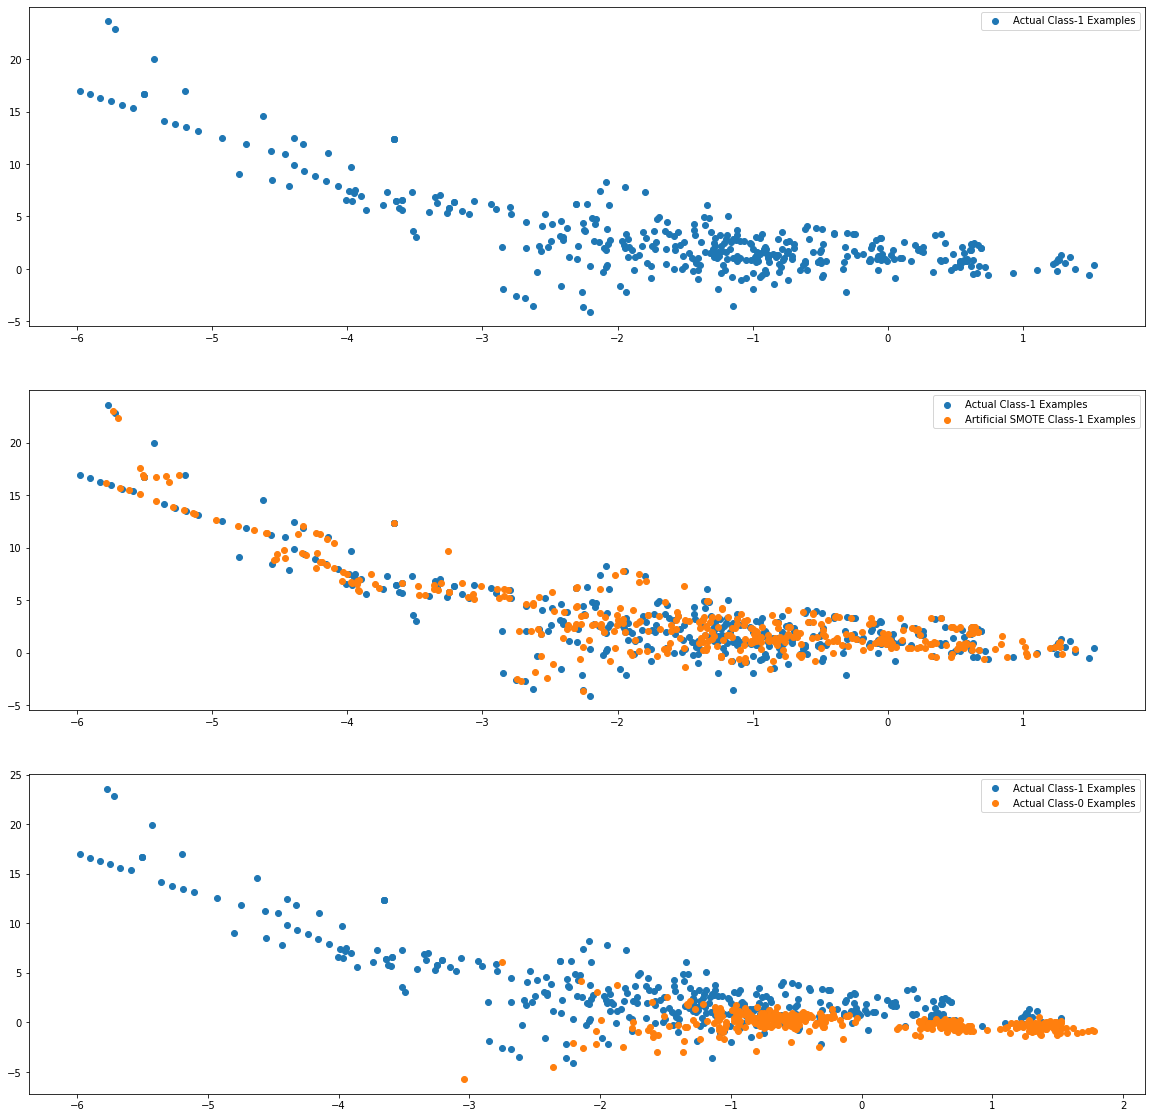

In [213]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

#### 1. Logistic Regression on balanced data with SMOTE

In [214]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_smote, y_train_smote)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.9906828721601275
Best hyperparameters:  {'C': 1000}


In [215]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.830130,0.071440,0.025137,0.001536,0.01,{'C': 0.01},0.990516,0.990583,0.990770,0.990260,0.990721,0.990570,0.000180,6,0.990575,0.990565,0.990518,0.990697,0.990554,0.990582,0.000061
1,0.821255,0.031637,0.028793,0.009320,0.1,{'C': 0.1},0.990603,0.990699,0.990866,0.990365,0.990821,0.990671,0.000179,5,0.990677,0.990662,0.990622,0.990800,0.990655,0.990683,0.000061
2,0.844696,0.033829,0.024706,0.000665,1,{'C': 1},0.990612,0.990712,0.990876,0.990376,0.990832,0.990682,0.000179,4,0.990688,0.990673,0.990633,0.990811,0.990665,0.990694,0.000061
3,0.878608,0.061022,0.030586,0.009768,10,{'C': 10},0.990612,0.990713,0.990877,0.990378,0.990833,0.990683,0.000179,3,0.990689,0.990674,0.990635,0.990812,0.990666,0.990695,0.000061
4,0.851317,0.027333,0.030364,0.005989,100,{'C': 100},0.990612,0.990713,0.990878,0.990378,0.990833,0.990683,0.000179,2,0.990689,0.990674,0.990635,0.990812,0.990666,0.990695,0.000061
5,0.850888,0.012556,0.025890,0.000489,1000,{'C': 1000},0.990612,0.990713,0.990878,0.990378,0.990833,0.990683,0.000179,1,0.990689,0.990674,0.990635,0.990812,0.990666,0.990695,0.000061


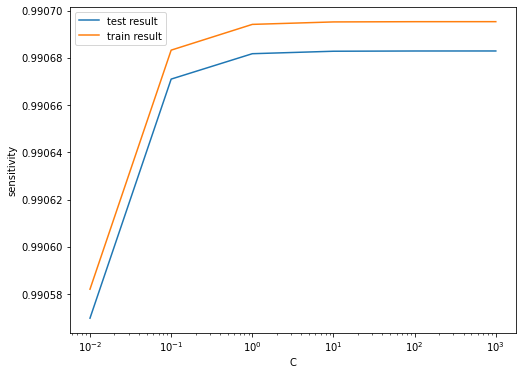

In [216]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

#### Logistic Regression with optimal C

In [217]:
# Printing best params
model_cv.best_params_

{'C': 1000}

In [219]:
# Instantiating the model
logreg_smote_model = LogisticRegression(C=1000)

# Fitting the model with balanced data
logreg_smote_model.fit(X_train_smote, y_train_smote)

LogisticRegression(C=1000)

#### Evaluating the model on train data

In [220]:
# Evaluating on train data
y_train_pred = logreg_smote_model.predict(X_train_smote)
display_scores(y_train_smote, y_train_pred)

F1 Score: 94.9%
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95    227451
           1       0.97      0.93      0.95    227451

    accuracy                           0.95    454902
   macro avg       0.95      0.95      0.95    454902
weighted avg       0.95      0.95      0.95    454902



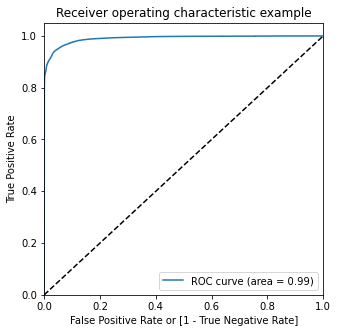

In [221]:
# Predicted probability
y_train_pred_proba_smote = logreg_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba_smote)

#### Evaluating on test data

In [222]:
# Evaluating on test data
y_test_pred = logreg_smote_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 9.56%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.05      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962



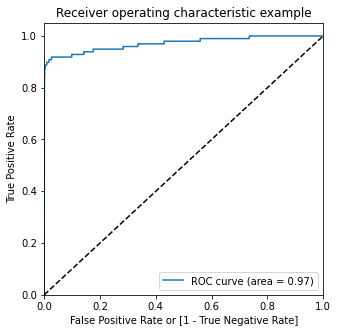

In [223]:
# Predicted probability
y_test_pred_proba_smote = logreg_smote_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba_smote)

**MODEL SUMMARY:**

- Train Set
    - ROC: 99%
    - F1 Score: 94.9%
     
- Test Set
    - ROC: 97%
    - F1 Score: 9.56%

##### Build models on other algorithms to see the better performing on SMOTE

### 2. Decision Tree on balanced data with SMOTE

In [225]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 5, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_smote,y_train_smote)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [226]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9984712696160305
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


#### Model with optimal hyperparameters

In [227]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 100}

In [228]:
# Model with optimal hyperparameters
dt_smote_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)

dt_smote_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100,
                       random_state=100)

#### Evaluating the model on train data

In [229]:
# Predictions on the train set
y_train_pred_smote = dt_smote_model.predict(X_train_smote)
display_scores(y_train_smote, y_train_pred_smote)

F1 Score: 98.97%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    227451
           1       0.99      0.99      0.99    227451

    accuracy                           0.99    454902
   macro avg       0.99      0.99      0.99    454902
weighted avg       0.99      0.99      0.99    454902



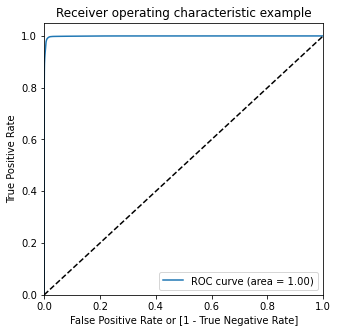

In [230]:
# Predicted probability
y_train_pred_proba = dt_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

#### Evaluating the model on the test set

In [231]:
# Evaluating model on the test data
y_pred = dt_smote_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 17.0%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.09      0.90      0.17        98

    accuracy                           0.98     56962
   macro avg       0.55      0.94      0.58     56962
weighted avg       1.00      0.98      0.99     56962



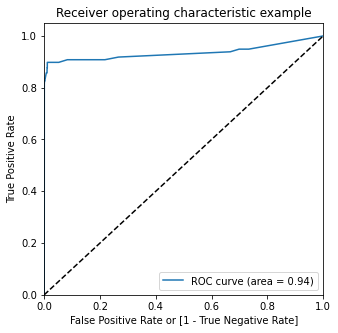

In [232]:
# Predicted probability
y_test_pred_smote = dt_smote_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_smote)

**MODEL SUMMARY:**

- Train Set
    - ROC: 100%
    - F1 Score: 98.97%
    
- Test Set
    - ROC: 94%
    - F1 Score: 17.0%

### 3. XGBoost on balanced data with SMOTE

In [233]:
# creating a KFold object 
folds = 4

# specify range of hyperparameters
param_grid = {'max_depth':[2,5],
              'n_estimators':[100,200],
            'learning_rate': [0.1, 0.6], 
             'subsample': [0.3, 0.6]}          


# specify model
xgb_model = XGBClassifier()

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_smote, y_train_smote)

Fitting 4 folds for each of 16 candidates, totalling 64 fits
[19:18:05] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:18:15] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:18:26] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used wi

[19:27:06] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:27:43] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:28:31] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[19:40:46] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:41:20] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:41:52] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [236]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,10.751174,0.419084,0.127941,0.007884,0.1,2,100,0.3,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",0.996200,0.995813,0.996221,0.996389,0.996156,0.000211,15,0.996181,0.996053,0.996329,0.996290,0.996213,0.000107
1,16.342185,0.372530,0.117661,0.001490,0.1,2,100,0.6,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",0.996134,0.995840,0.996247,0.996358,0.996145,0.000193,16,0.996140,0.996085,0.996390,0.996294,0.996227,0.000121
2,21.473552,0.505681,0.137929,0.013087,0.1,2,200,0.3,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",0.998576,0.998474,0.998655,0.998615,0.998580,0.000067,13,0.998640,0.998582,0.998713,0.998592,0.998632,0.000052
3,31.697996,1.429049,0.134616,0.010797,0.1,2,200,0.6,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",0.998497,0.998403,0.998560,0.998629,0.998522,0.000083,14,0.998577,0.998519,0.998645,0.998589,0.998582,0.000045
4,24.704231,1.008630,0.149030,0.017607,0.1,5,100,0.3,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.999872,0.999803,0.999848,0.999881,0.999851,0.000030,9,0.999879,0.999891,0.999880,0.999886,0.999884,0.000005


In [237]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9999948837902235
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.6, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.3,
              tree_method='exact', validate_parameters=1, verbosity=None)


#### Model with optimal hyperparameter

In [238]:
model_cv.best_params_

{'learning_rate': 0.6, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.3}

In [240]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.6,
          'max_depth': 5, 
          'n_estimators':200,
          'subsample':0.3,
         'objective':'binary:logistic'}

# fit model on training data
xgb_smote_model = XGBClassifier(learning_rate = 0.6,max_depth=5,n_estimators=200,subsample=0.3,objective='binary:logistic')
xgb_smote_model.fit(X_train_smote, y_train_smote)

[20:04:46] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.6, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.3,
              tree_method='exact', validate_parameters=1, verbosity=None)

#### Evaluating the model on the train data

In [241]:
y_train_pred = xgb_smote_model.predict(X_train_smote)
display_scores(y_train_smote, y_train_pred)

F1 Score: 100.0%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902



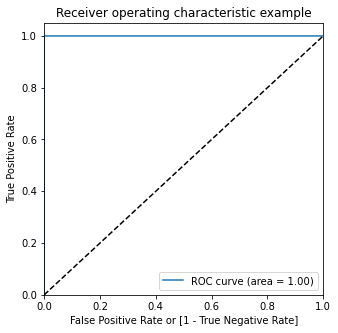

In [242]:
# Predicted probability
y_train_pred_proba = xgb_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

#### Evaluating the model on test data

In [243]:
y_pred = xgb_smote_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 79.81%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.75      0.85      0.80        98

    accuracy                           1.00     56962
   macro avg       0.88      0.92      0.90     56962
weighted avg       1.00      1.00      1.00     56962



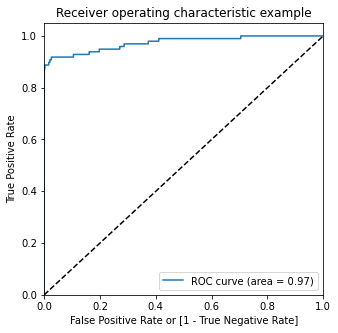

In [244]:
# Predicted probability
y_test_pred_proba = xgb_smote_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**MODEL SUMMARY:**

- Train Set
    - ROC: 100%
    - F1 Score: 100%
    
- Test Set
    - ROC: 97%
    - F1 Score: 79.81%

### 4.RandomForest with SMOTE

In [302]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
model_cv = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 4,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
model_cv.fit(X_train_smote, y_train_smote)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [303]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,264.946039,0.255423,0.911346,0.007379,5,10,50,50,100,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.952368,0.954733,0.952948,0.953572,0.953405,0.000877,21,0.952048,0.954812,0.953866,0.953611,0.953584,0.000993
1,506.413672,0.668867,1.926003,0.024017,5,10,50,50,200,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.954716,0.952834,0.954320,0.954126,0.953999,0.000705,17,0.954625,0.953147,0.955161,0.954194,0.954282,0.000739
2,721.064230,0.957091,2.663685,0.044407,5,10,50,50,300,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.955006,0.954707,0.953071,0.953590,0.954093,0.000792,15,0.955061,0.954997,0.953825,0.953400,0.954321,0.000725
3,241.010899,0.168463,0.885112,0.005454,5,10,50,100,100,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.956211,0.952087,0.953810,0.954073,0.954045,0.001465,16,0.956155,0.952781,0.954645,0.954039,0.954405,0.001214
4,478.494779,0.298205,1.742443,0.009678,5,10,50,100,200,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.954944,0.954795,0.953994,0.953423,0.954289,0.000617,14,0.954894,0.954742,0.954595,0.953479,0.954428,0.000558
5,719.193685,0.748458,2.496875,0.051318,5,10,50,100,300,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.953247,0.954338,0.952447,0.951989,0.953005,0.000891,22,0.953147,0.954531,0.953095,0.952107,0.953220,0.000863
6,241.404242,0.286880,0.886420,0.024756,5,10,100,50,100,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.952306,0.953133,0.953687,0.952499,0.952906,0.000544,23,0.952291,0.953373,0.954575,0.952327,0.953142,0.000935
7,471.539786,0.229646,1.670157,0.046939,5,10,100,50,200,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.952394,0.953643,0.951910,0.953651,0.952900,0.000767,24,0.952300,0.953889,0.952737,0.953734,0.953165,0.000667
8,698.358630,1.228772,2.645607,0.099849,5,10,100,50,300,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.955498,0.953573,0.953836,0.952139,0.953761,0.001193,20,0.955530,0.954018,0.954710,0.952218,0.954119,0.001221
9,233.408806,0.267504,0.873529,0.010186,5,10,100,100,100,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.955736,0.953581,0.953168,0.954707,0.954298,0.001003,13,0.955621,0.953965,0.953912,0.954827,0.954581,0.000702


In [304]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9653617694052533
RandomForestClassifier(max_depth=5, max_features=20, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=300)


#### Model with optimal hyperparameter

In [305]:
model_cv.best_params_

{'max_depth': 5,
 'max_features': 20,
 'min_samples_leaf': 50,
 'min_samples_split': 100,
 'n_estimators': 300}

In [306]:
# chosen hyperparameters
params = {'max_depth': 5,
          'max_features': 20,
          'min_samples_leaf': 50,
          'min_samples_split': 100,
          'n_estimators':300}

# fit model on training data
rf_smote_model = RandomForestClassifier(max_depth = 5,max_features=20,min_samples_leaf=50,min_samples_split=100,n_estimators=300)
rf_smote_model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(max_depth=5, max_features=20, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=300)

#### Model evaluation on train data

In [307]:
# Predictions on the train set
y_train_pred = rf_smote_model.predict(X_train_smote)

display_scores(y_train_smote, y_train_pred)

F1 Score: 96.52%
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97    227451
           1       0.99      0.94      0.97    227451

    accuracy                           0.97    454902
   macro avg       0.97      0.97      0.97    454902
weighted avg       0.97      0.97      0.97    454902



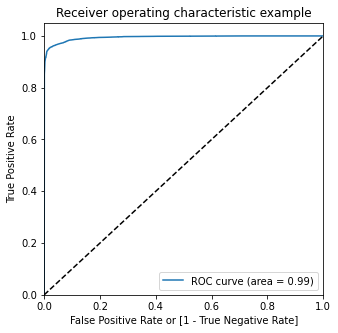

In [309]:
# Predicted probability
y_train_pred_proba = rf_smote_model.predict_proba(X_train_smote)[:,1]

# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

#### Model evaluation on test data

In [310]:
y_pred = rf_smote_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 19.55%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.11      0.88      0.20        98

    accuracy                           0.99     56962
   macro avg       0.55      0.93      0.59     56962
weighted avg       1.00      0.99      0.99     56962



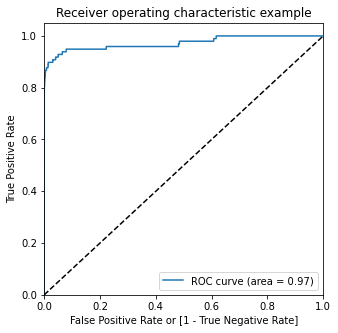

In [311]:
# Predicted probability
y_test_pred_proba = rf_smote_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**MODEL SUMMARY:**

- Train Set
    - ROC: 99%
    - F1 Score: 96.52%
    
- Test Set
    - ROC: 97%
    - F1 Score: 19.55%

### Print the class distribution after applying ADASYN

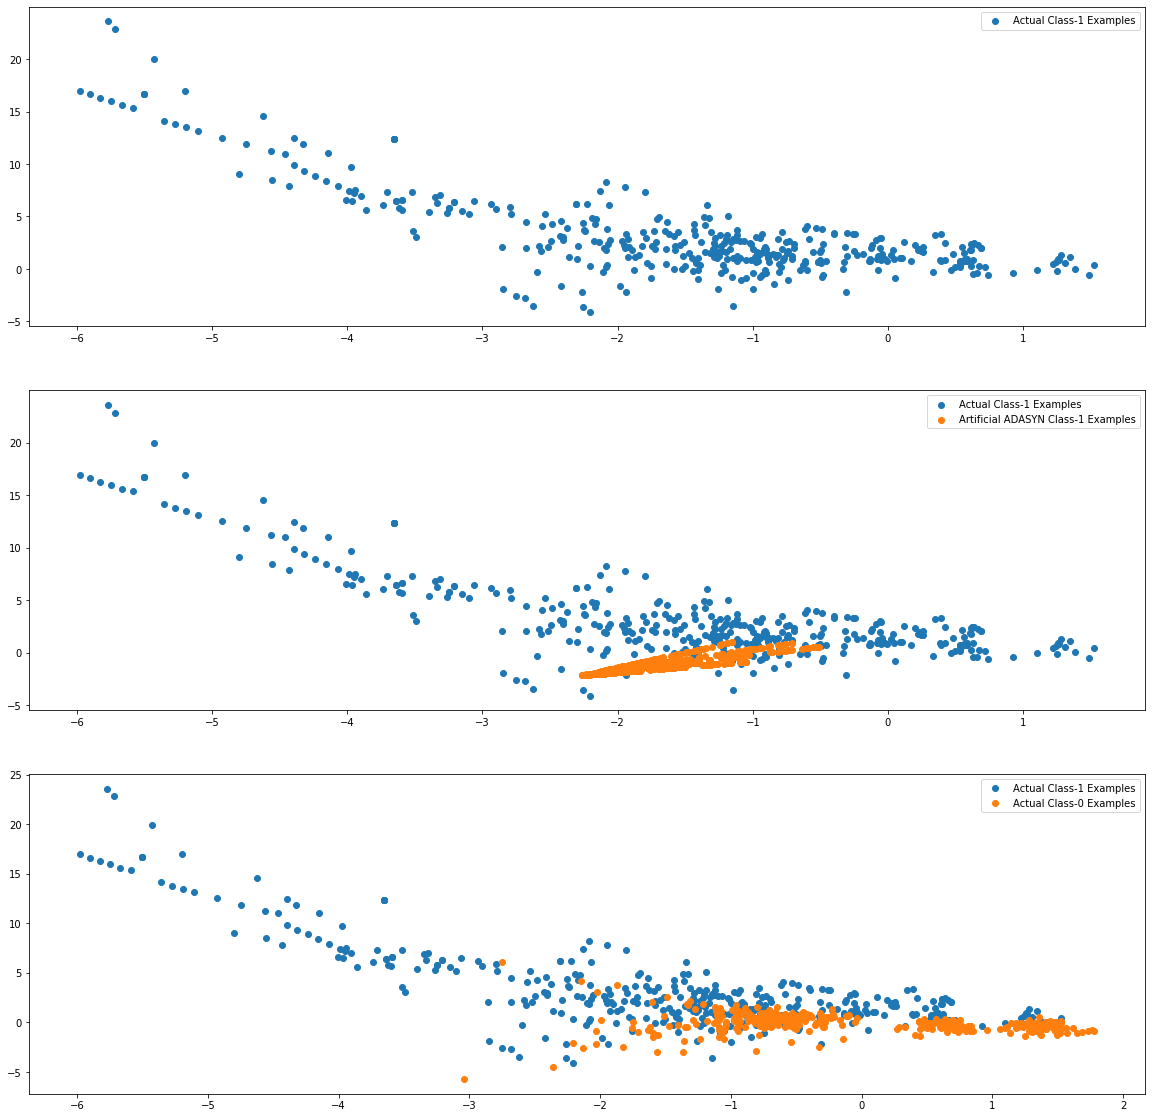

In [246]:
from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

#### 1. Logistic Regression on balanced data with ADASYN

In [247]:
# Creating KFold object with 3 splits
folds = KFold(n_splits=3, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best ROC AUC score:  0.9679805356900588
Best hyperparameters:  {'C': 1000}


In [249]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.024817,0.181326,0.058044,0.014205,0.01,{'C': 0.01},0.966958,0.967965,0.968268,0.967730,0.000560,6,0.967995,0.967602,0.967692,0.967763,0.000168
1,1.077384,0.134525,0.045784,0.003560,0.1,{'C': 0.1},0.967174,0.968202,0.968502,0.967959,0.000569,5,0.968232,0.967829,0.967913,0.967992,0.000174
2,0.870068,0.099632,0.056239,0.011459,1,{'C': 1},0.967192,0.968222,0.968522,0.967979,0.000570,4,0.968253,0.967848,0.967931,0.968011,0.000174
3,1.142055,0.174760,0.063870,0.025526,10,{'C': 10},0.967194,0.968224,0.968524,0.967980,0.000570,3,0.968255,0.967850,0.967932,0.968012,0.000175
4,0.993503,0.175316,0.053417,0.016350,100,{'C': 100},0.967194,0.968224,0.968524,0.967981,0.000570,2,0.968255,0.967850,0.967933,0.968013,0.000175


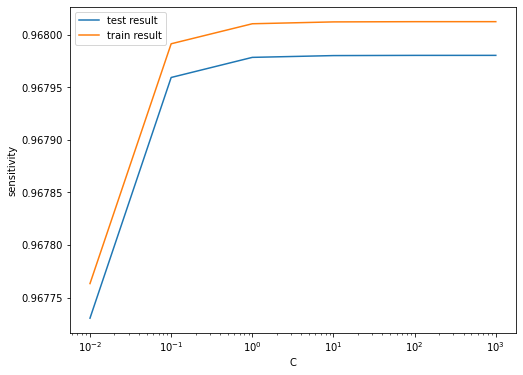

In [250]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

#### Logistic Regression with optimal C

In [251]:
model_cv.best_params_

{'C': 1000}

In [252]:
# Instantiating the model
logreg_adasyn_model = LogisticRegression(C=1000)

# Fitting the model 
logreg_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

LogisticRegression(C=1000)

#### Evaluating the model with train data

In [253]:
# Evaluating on test data
y_train_pred = logreg_adasyn_model.predict(X_train_adasyn)
display_scores(y_train_adasyn, y_train_pred)

F1 Score: 90.52%
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.91      0.91    227451
           1       0.91      0.90      0.91    227434

    accuracy                           0.91    454885
   macro avg       0.91      0.91      0.91    454885
weighted avg       0.91      0.91      0.91    454885



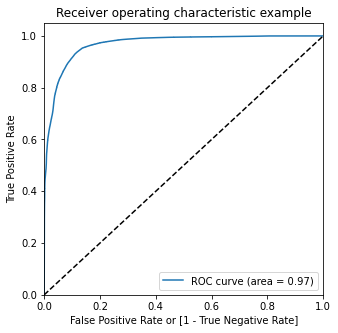

In [254]:
# Predicted probability
y_train_pred_proba = logreg_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

#### Evaluating on test data

In [255]:
# Evaluating on test data
y_pred = logreg_adasyn_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 3.45%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.91      0.95     56864
           1       0.02      0.93      0.03        98

    accuracy                           0.91     56962
   macro avg       0.51      0.92      0.49     56962
weighted avg       1.00      0.91      0.95     56962



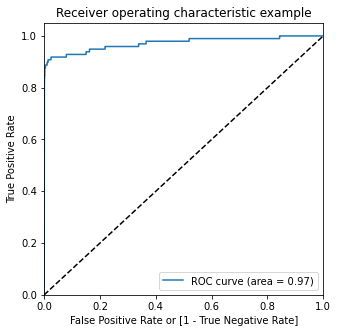

In [256]:
# Predicted probability
y_test_pred_proba = logreg_adasyn_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**MODEL SUMMARY:**

- Train Set
    - ROC: 97%
    - F1 Score: 90.42%
    
- Test Set
    - ROC: 97%
    - F1 Score: 3.45%

##### Build models on other algorithms to see the better performing on ADASYN

### 2. Decision Tree on balanced data with ADASYN

In [257]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 5, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_adasyn,y_train_adasyn)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [258]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9488962915239311
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50)


#### Model with optimal hyperparameters

In [259]:
# Model with optimal hyperparameters
dt_adasyn_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)

dt_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50,
                       random_state=100)

#### Evaluating the model on train data

In [260]:
# Evaluating model on the test data
y_train_pred = dt_adasyn_model.predict(X_train_adasyn)
display_scores(y_train_adasyn, y_train_pred)

F1 Score: 97.72%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98    227451
           1       0.97      0.99      0.98    227434

    accuracy                           0.98    454885
   macro avg       0.98      0.98      0.98    454885
weighted avg       0.98      0.98      0.98    454885



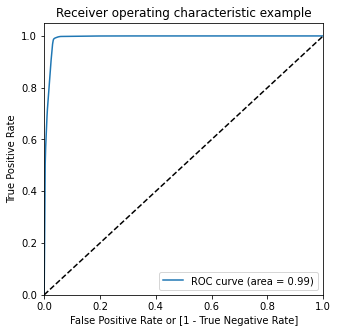

In [261]:
# Predicted probability
y_train_pred_proba = dt_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

#### Evaluating the model on the test set

In [262]:
# Evaluating model on the test data
y_pred = dt_adasyn_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 8.08%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.04      0.88      0.08        98

    accuracy                           0.97     56962
   macro avg       0.52      0.92      0.53     56962
weighted avg       1.00      0.97      0.98     56962



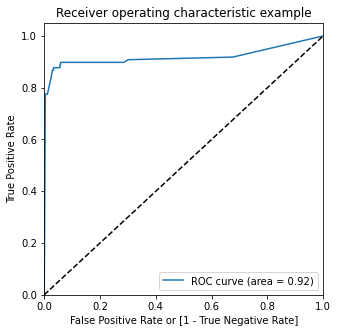

In [263]:
# Predicted probability
y_test_pred_proba = dt_adasyn_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**MODEL SUMMARY:**

- Train Set
    - ROC: 99%
    - F1 Score: 97.72%
    
- Test Set
    - ROC: 92%
    - F1 Score: 8.08%

### 3. XGBoost on balanced data with ADASYN

In [266]:
# creating a KFold object 
folds = 4

# specify range of hyperparameters
param_grid = {'max_depth':[2,5],
              'n_estimators':[100,200],
            'learning_rate': [0.1, 0.6], 
             'subsample': [0.3, 0.6]}  
# specify model
xgb_model = XGBClassifier()

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 4 folds for each of 16 candidates, totalling 64 fits
[20:23:45] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:23:59] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:24:13] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used wi

[20:34:15] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:35:03] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:36:00] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[20:47:46] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:48:14] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:48:43] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [268]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,12.999115,0.423899,0.152084,0.022373,0.1,2,100,0.3,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",0.959244,0.976155,0.977820,0.978003,0.972806,0.007863,15,0.991004,0.990445,0.989202,0.990070,0.990180,0.000655
1,18.207838,0.589503,0.148766,0.037864,0.1,2,100,0.6,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",0.959984,0.976801,0.977688,0.975507,0.972495,0.007265,16,0.990899,0.990061,0.989615,0.990380,0.990239,0.000468
2,24.902130,1.421504,0.142497,0.011358,0.1,2,200,0.3,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",0.968988,0.982018,0.985443,0.975962,0.978102,0.006262,13,0.997171,0.996436,0.995757,0.996470,0.996458,0.000500
3,37.254888,1.724141,0.147403,0.005875,0.1,2,200,0.6,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",0.970086,0.982441,0.985580,0.973799,0.977976,0.006274,14,0.997152,0.996370,0.995929,0.996483,0.996483,0.000438
4,28.230688,2.230254,0.147045,0.009620,0.1,5,100,0.3,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.982152,0.989792,0.995660,0.982210,0.987453,0.005666,7,0.999854,0.999799,0.999772,0.999766,0.999797,0.000035


In [269]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9952095990133172
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.6, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)


#### Model with optimal hyperparameter

In [270]:
model_cv.best_params_

{'learning_rate': 0.6, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.6}

In [274]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.6,
          'max_depth': 5, 
          'n_estimators':200,
          'subsample':0.6,
          'objective':'binary:logistic'}

# Model with optimal hyperparameter
xgb_adasyn_model = XGBClassifier(learning_rate=0.6,max_depth=5,n_estimators=200,subsample=0.6,objective='binary:logistic')
xgb_adasyn_model.fit(X_train_adasyn,y_train_adasyn)

[21:26:26] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.6, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

#### Evaluating the model on the train data

In [275]:
# Predicting on the train set
y_train_pred = xgb_adasyn_model.predict(X_train_adasyn)

# Printing the scores
display_scores(y_train_adasyn, y_train_pred)

F1 Score: 100.0%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227434

    accuracy                           1.00    454885
   macro avg       1.00      1.00      1.00    454885
weighted avg       1.00      1.00      1.00    454885



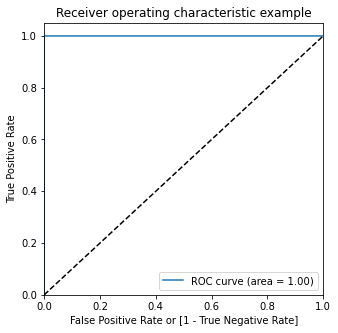

In [276]:
# Predicted probability
y_train_pred_proba = xgb_adasyn_model.predict_proba(X_train_adasyn)[:,1]

# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

#### Evaluating the model on test data

In [277]:
y_pred = xgb_adasyn_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 79.43%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.75      0.85      0.79        98

    accuracy                           1.00     56962
   macro avg       0.87      0.92      0.90     56962
weighted avg       1.00      1.00      1.00     56962



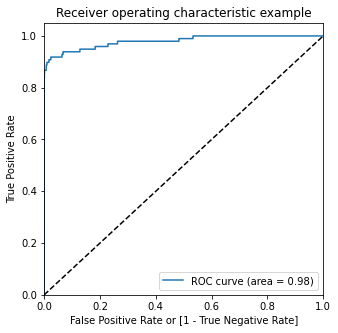

In [278]:
# Predicted probability
y_test_pred_proba = xgb_adasyn_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**MODEL SUMMARY:**

- Train Set
    - ROC: 100%
    - F1 Score: 100%
    
- Test Set
    - ROC: 98%
    - F1 Score: 79.43%

### 4.RandomForest with ADASYN

In [279]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
model_cv = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 4,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [280]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,246.121663,0.323918,1.071907,0.033293,5,10,50,50,100,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.850029,0.916234,0.909304,0.925185,0.900188,0.029502,9,0.953324,0.950983,0.950643,0.946272,0.950305,0.002547
1,484.864489,0.646550,2.098407,0.040141,5,10,50,50,200,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.849141,0.912892,0.903817,0.926408,0.898064,0.029368,11,0.955532,0.951446,0.950599,0.947113,0.951172,0.002995
2,714.823488,0.741068,2.687573,0.041894,5,10,50,50,300,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.853256,0.912400,0.909278,0.928975,0.900977,0.028551,4,0.954626,0.949379,0.948723,0.949511,0.950560,0.002366
3,251.805603,0.496941,1.073546,0.015741,5,10,50,100,100,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.846890,0.915337,0.915117,0.928377,0.901430,0.031943,1,0.952002,0.948383,0.950651,0.951103,0.950535,0.001334
4,448.341671,0.782464,1.923599,0.239845,5,10,50,100,200,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.852852,0.913297,0.909894,0.927735,0.900944,0.028563,5,0.953814,0.949646,0.949813,0.948790,0.950516,0.001943
5,699.307182,1.207081,2.684458,0.017801,5,10,50,100,300,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.852359,0.913859,0.912857,0.926302,0.901344,0.028773,2,0.955954,0.950335,0.950250,0.949189,0.951432,0.002649
6,247.506442,0.192866,0.904877,0.015205,5,10,100,50,100,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.851383,0.915108,0.907423,0.925660,0.899893,0.028746,10,0.952882,0.950774,0.943452,0.947190,0.948575,0.003590
7,452.491263,0.519074,1.800289,0.063487,5,10,100,50,200,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.848640,0.913921,0.913217,0.925669,0.900362,0.030269,8,0.956358,0.950346,0.949502,0.949274,0.951370,0.002907
8,685.282563,1.863730,2.984548,0.058795,5,10,100,50,300,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.851955,0.913446,0.909128,0.929855,0.901096,0.029406,3,0.955860,0.950669,0.947717,0.949153,0.950850,0.003075
9,225.831027,0.301254,0.897297,0.016930,5,10,100,100,100,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.848411,0.913147,0.902700,0.925695,0.897488,0.029481,13,0.956853,0.952762,0.946700,0.947368,0.950921,0.004154


In [281]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9014301516655151
RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=100)


#### Model with optimal hyperparameter

In [282]:
model_cv.best_params_

{'max_depth': 5,
 'max_features': 10,
 'min_samples_leaf': 50,
 'min_samples_split': 100,
 'n_estimators': 100}

In [285]:
# chosen hyperparameters
params = {'max_depth': 5,
          'max_features': 10,
          'min_samples_leaf': 50,
          'min_samples_split': 100,
          'n_estimators':100}

# fit model on training data
rf_adasyn_model = RandomForestClassifier(max_depth = 5,max_features=10,min_samples_leaf=50,min_samples_split=100,n_estimators=100)
rf_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=100)

#### Model evaluation on train data

In [286]:
# Predictions on the train set
y_train_pred = rf_adasyn_model.predict(X_train_adasyn)

display_scores(y_train_adasyn, y_train_pred)

F1 Score: 94.49%
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.95      0.95    227451
           1       0.95      0.94      0.94    227434

    accuracy                           0.95    454885
   macro avg       0.95      0.95      0.95    454885
weighted avg       0.95      0.95      0.95    454885



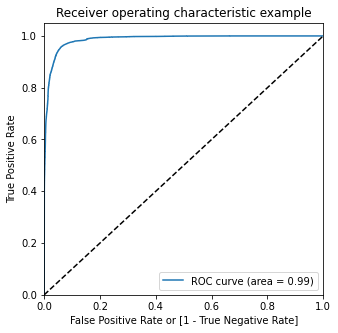

In [287]:
# Predicted probability
y_train_pred_proba = rf_adasyn_model.predict_proba(X_train_adasyn)[:,1]

# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

#### Model evaluation on test data

In [288]:
y_pred = rf_adasyn_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 5.95%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.95      0.97     56864
           1       0.03      0.92      0.06        98

    accuracy                           0.95     56962
   macro avg       0.52      0.93      0.52     56962
weighted avg       1.00      0.95      0.97     56962



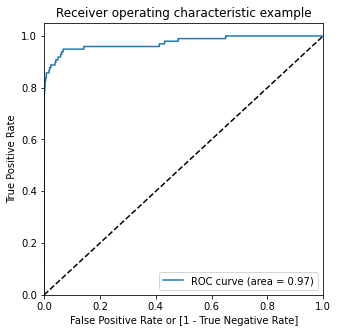

In [289]:
# Predicted probability
y_test_pred_proba = rf_adasyn_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**MODEL SUMMARY:**

- Train Set
    - ROC: 99%
    - F1 Score: 94.49%
    
- Test Set
    - ROC: 97%
    - F1 Score: 5.95%

We have used several balancing technique to solve the minority class imbalance. We have used Random Oversampling, SMOTE, and Adasyn technique to balance the dataset and then we performed logistic regression, Decision Trees,Random Forest and XGBoost algorithms to build models on each sampling method.

After conducting the experiment on each oversampling method, we have found that XGBoost model is performing well on the dataset which is balanced with Random Oversampling technique. We got ROC score 100% on train data and 98% on the test data and F1 score 100% on train data and 85.86% in the test data.

Hence, we conclude that the `XGBoost model with Random Oversampling` is the best model.

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [294]:
# perform the best oversampling method on X_train & y_train

# chosen hyperparameters
params = {'learning_rate': 0.6,
          'max_depth': 5, 
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
clf = XGBClassifier(learning_rate = 0.6,max_depth=5,n_estimators=200,subsample=0.6,objective='binary:logistic')  #initialise the model with optimum hyperparameters
clf.fit(X_over,y_over) # fit on the balanced dataset


#print the evaluation score on the X_test by choosing the best evaluation metric
# Making prediction on the test set
y_test_pred = clf.predict(X_test)
display_scores(y_test, y_test_pred)

[00:32:40] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
F1 Score: 84.38%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.83      0.84        98

    accuracy                           1.00     56962
   macro avg       0.93      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962



### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 10


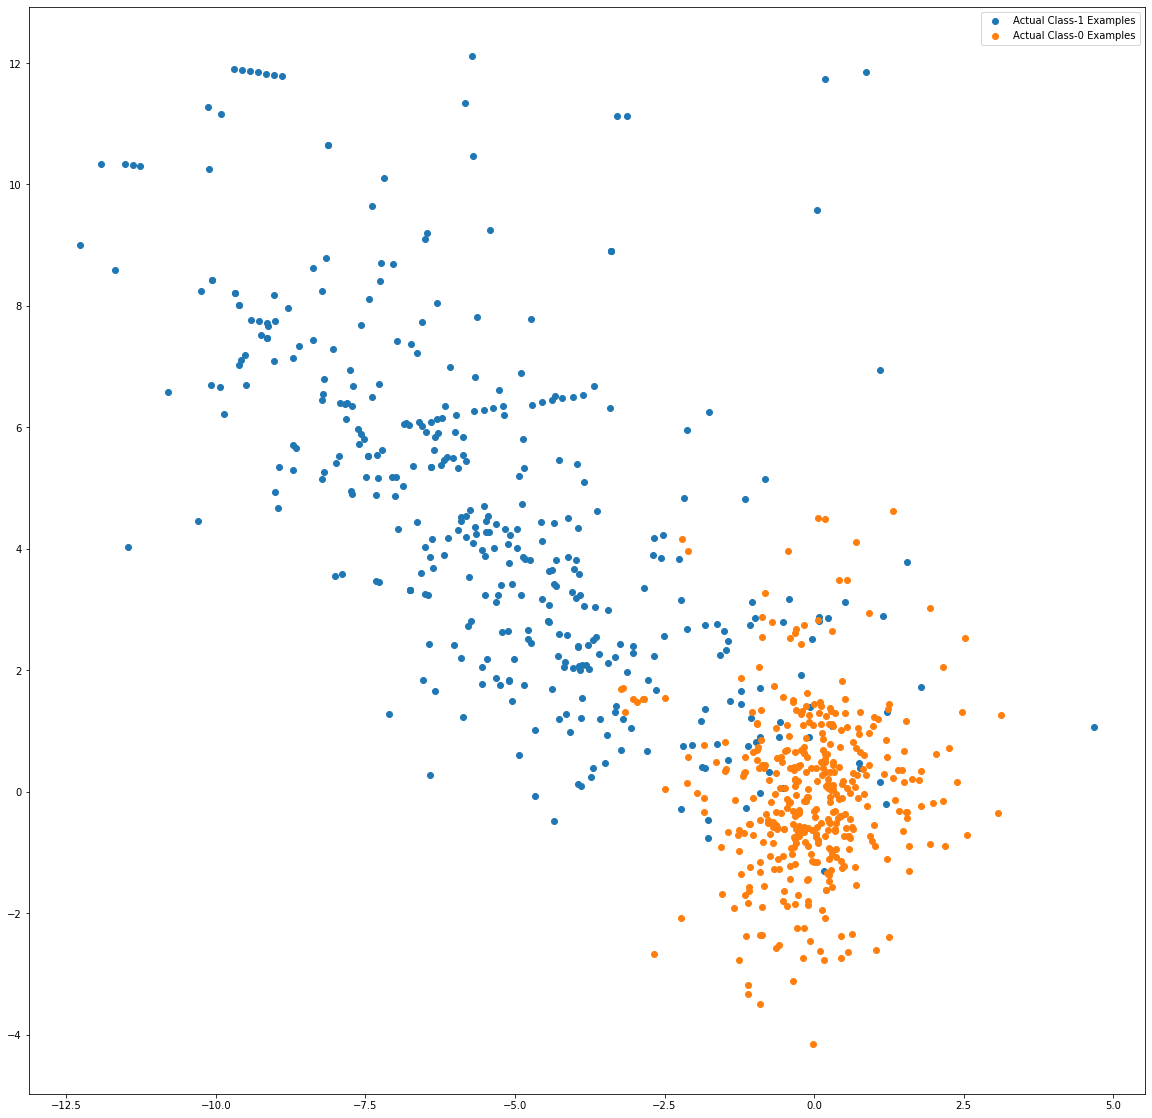

In [295]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

#### Print the FPR,TPR & select the best threshold from the roc curve

In [300]:
#predicting the probability for X_train for Random Oversampling
y_train_over_predict_proba = xgb_over_model.predict_proba(X_over)[:,1]

#printing fpr,tpr,auc
print('Train auc =', metrics.roc_auc_score(y_over,y_train_over_predict_proba))
fpr, tpr, thresholds = metrics.roc_curve(y_over,y_train_over_predict_proba)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Train auc = 1.0
0.9996525
